# **Daegu Apartment Analysis**

Fannia Marvela  

**Contents**
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation 
--------------------------------------------------------------------

# **1. Business Problem Understanding**

**Context**  
Daegu City, also known as the Metropolitan City of Daegu, is a city surrounded by mountains in South Korea with a population of more than 2.5 million people. As the third-largest metropolitan city in South Korea after Seoul and Busan, like other metropolitan areas, apartments are one of the answers to the housing needs of modern society due to the limited residential land and the dense business activities in urban areas. Additionally, in 2020, the apartment price index in Daegu City was 88.2, showing a 1.9% increase compared to the previous year, indicating growth in the potential for apartment sales and interest in purchasing apartments in Daegu.

The majority of the population, especially in major cities in South Korea, prefers to conduct apartment sales or purchases through real estate agents, which has led to an increase in the number of real estate agents offering their services to help buy or sell apartments. An individual or company can usually make an offer for an apartment unit. The price of the apartment unit can be determined by the bidder through a platform, which sometimes makes it difficult for apartment owners to set a price that aligns with the market value.

If the selling price is too high compared to the market price, it will be difficult to sell the apartment. On the other hand, if the selling price is too low, the owner will have trouble achieving the maximum profit. Therefore, for real estate agents who will assist apartment owners in determining the estimated selling price, it is important to conduct an analysis of the factors influencing apartment pricing, both internal and external, using apartment price datasets in Daegu as a reference.

**Problem Statement**  
One of the biggest challenges for real estate agents, especially in Daegu City, South Korea, is determining the selling price of an apartment that is in line with the market price, as the selling price is a key indicator for a property to sell. Before making a transaction, consumers will research the prices of apartments for sale and compare them with other apartments. Typically, the higher the price offered for an apartment, the more consumers expect better facilities and quality. Therefore, as the number of apartments for sale increases, determining the right selling price to remain competitive in Daegu, South Korea, is crucial to ensure that apartment prices in a certain area are still considered reasonable.

**Goals**  
Based on this issue, as a data analyst, we will build a model that can predict the selling price of an apartment in line with the market price, considering various external and internal factors that influence the apartment's price, such as location, facilities, building age, size, and others.

By using the right predictive model, we can help real estate agents determine the appropriate selling price for apartments in Daegu, South Korea, which can increase the chances of successfully marketing and selling the apartment units. Setting the right selling price is crucial because it will determine whether the apartment can be sold quickly at a reasonable price, while also maximizing the owner's profit.

**Analytic Approach**  
Therefore, to determine the correct selling price of an apartment in Daegu, South Korea, it is necessary to perform data analysis to explore and identify patterns within the data, as well as build a regression model as a method to test whether there is any influence between various features and the selling price of the apartment, expressed in the form of a mathematical equation. The regression model created can also predict the selling price of an apartment and, thus, help new apartment owners determine an appropriate selling price.

**Metric Evaluation**  
The evaluation metrics used for the regression model are RMSE, MAE, and MAPE. However, MAPE is chosen as the primary evaluation metric because it provides results that are easy to interpret and can help explain prediction errors to stakeholders, such as real estate agents. Additionally, the regression model will be evaluated exploratively using a residual plot.

In a regression model, residuals represent the difference between the predicted values and the actual values, so residuals are used to measure how close the predicted values are to the real values. RMSE is the square root of the mean squared residuals. MAE is the mean of the absolute errors and is a metric that is not sensitive to outliers. MAPE is the percentage of the mean absolute error. The smaller the values of RMSE, MAE, and MAPE, the better the model will be at predicting the apartment prices.

Furthermore, the evaluation metrics R-Squared and Adjusted R-Squared can also be used if the best model chosen is a linear model. R-Squared is the coefficient of determination used to measure how well the regression line represents the data. The R-Squared value ranges from 0 to 1, and the closer the value is to 1, the better the regression line will be at representing the data.



# **2. Data Understanding**

The data used is the Daegu Apartment dataset, which contains information on the type, size, location, facilities, year of construction, and selling price of apartments in Daegu, South Korea, built between 1978 and 2015.

**Attribute Information**  
There are 11 columns in the Daegu Apartment dataset, which are as follows:

| Attribute | Data Type | Description |
| --- | --- | --- |
| HallwayType| Object | Apartment type |
| TimeToSubway | Object | The time it takes to reach the nearest subway station|
| SubwayStation | Object | The name of the nearest subway station. |
| N_FacilitiesNearBy(ETC) | Float | The number of nearby facilities |
| N_FacilitiesNearBy(PublicOffice) | Float | The number of nearby public offices |
| N_SchoolNearBy(University) | Float | The number of nearby university |
| N_Parkinglot(Basement) | Float | The number of parking lot in the basement |
| YearBuilt | Integer | The year the apartment was built |
| N_FacilitiesInApt | Integer | The number of facilities in the apartment |
| Size(sqft) | Integer | The size of the apartment (in square feet) |
| SalePrice | Integer | The price of the apartment (in Won) |


In [4]:
# Import library

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

# Statistics
from scipy.stats import normaltest
from scipy.stats import skew

# Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PolynomialFeatures

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.compose import TransformedTargetRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## **Data**

Here are the first 5 data entries from the Daegu Apartment dataset:

In [5]:
# Load dataset

df=pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [6]:
# The number and type of data in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [7]:
# The unique data in the TimeToSubway feature

df['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

In [8]:
# Changing the format of the TimeToSubway feature

df.loc[df['TimeToSubway']=='5min~10min','TimeToSubway']='5min-10min'
df.loc[df['TimeToSubway']=='10min~15min','TimeToSubway']='10min-15min'
df.loc[df['TimeToSubway']=='15min~20min','TimeToSubway']='15min-20min'

We will replace the '~' symbol in the TimeToSubway column with a '-'. This formatting change is made to standardize the writing format and avoid any inconsistencies.

# **Explanatory Data Analysis**

## **Statistics Summary**

In [9]:
df.describe(include='all')

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123,4123,4123,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
unique,3,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,terraced,0-5min,Kyungbuk_uni_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2528,1953,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,NaN,NaN,NaN,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,NaN,NaN,NaN,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,NaN,NaN,NaN,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,NaN,NaN,NaN,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000


In [10]:
# The number of unique data in the HallwayType feature

df['HallwayType'].value_counts()

HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64

In [11]:
# The number of unique data in the TimeToSubway feature

df['TimeToSubway'].value_counts()

TimeToSubway
0-5min                1953
5min-10min             787
15min-20min            629
10min-15min            583
no_bus_stop_nearby     171
Name: count, dtype: int64

In [12]:
# The number of unique data in the SubwayStation feature

df['SubwayStation'].value_counts()

SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64

In general, the information obtained from the data above is as follows:
* There are 4,123 data entries with 11 features in the dataset.
* The most common apartment type is terrace apartments (61.3%), followed by mixed apartments (27.4%) and corridor apartments (11.3%).
* Most apartments in Daegu are relatively close to subway stations, as the majority only require 0-5 minutes to reach the station, and Kyungbuk Uni Hospital Station is the closest to most apartments.
* Apartments in Daegu have an average of 2 facilities, 4 public offices, 3 universities, and 569 nearby basement parking spaces.
* The average apartment in Daegu was built in 2003, which can be considered fairly old, as the oldest apartment in Daegu was built in 1978 and the newest was built in 2015.
* Apartments in Daegu have an average of 6 facilities within the apartment, with the number of facilities considered quite high, as the apartment with the most facilities has up to 10.
* The size and price of apartments in Daegu vary significantly, with an average size of 954.63 square feet and an average price of 221,767.93 won, making the average price of apartments in Daegu 232.31 won per square foot.

## **Data Distribution**

We will examine the data distribution using histograms for continuous data, including the year the apartment was built (YearBuilt), the size of the apartment (Size(sqf)), and the price of the apartment (SalePrice).

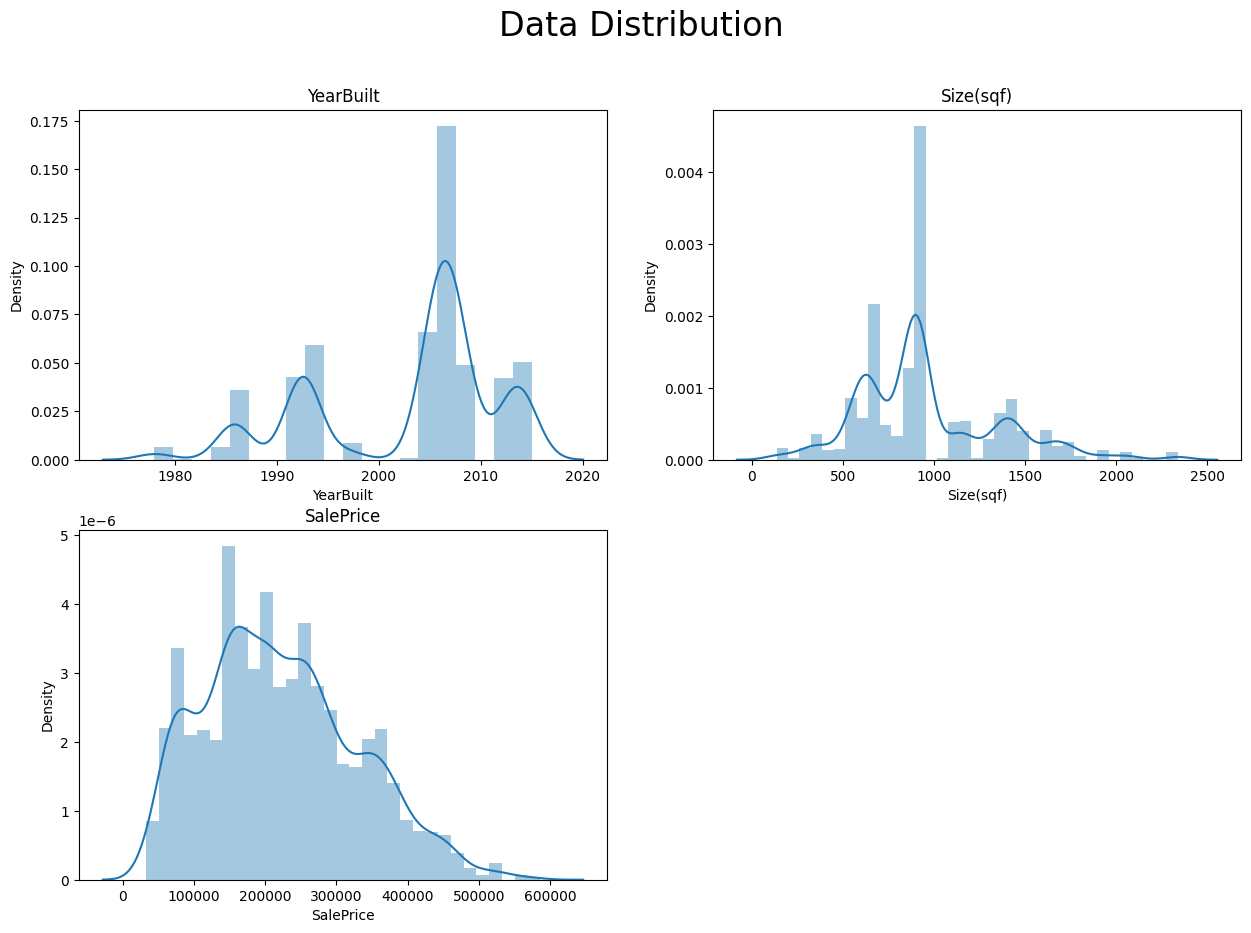

In [13]:
# Distribution of the features YearBuilt, Size(sqf), and SalePrice

plt.figure(figsize=(15,10))

columns=['YearBuilt','Size(sqf)','SalePrice']

plotnumber=1
for kolom in columns:
    plt.subplot(2,2,plotnumber)
    sns.distplot(df[kolom])
    plt.title(kolom)

    plotnumber +=1

plt.suptitle('Data Distribution',size=24)
plt.show()

In [14]:
# Normality test for the features YearBuilt, Size(sqf), and SalePrice

column=['YearBuilt','Size(sqf)','SalePrice']

result=[]
for i in column:
    stats,pval=normaltest(df[i])
    if pval>0.05:
        result.append('Normally distributed')
    else:
        result.append('Not normally distributed')

pd.DataFrame({'Column':column, 'Distribution':result})

,Column,Distribution
0,YearBuilt,Not normally distributed
1,Size(sqf),Not normally distributed
2,SalePrice,Not normally distributed


In [15]:
# Skewness of the features YearBuilt, Size(sqf), and SalePrice

column=['YearBuilt','Size(sqf)','SalePrice']

result=[]
for i in column:
    result=skew(df[column])

pd.DataFrame({'Column':column, 'Skewness':result})

,Column,Skewness
0,YearBuilt,-0.806939
1,Size(sqf),0.875522
2,SalePrice,0.452157


* Based on the histogram and normality test, the columns YearBuilt, Size(sqf), and SalePrice do not follow a normal distribution.
* Based on the histogram and skewness results, YearBuilt has a negative skewness, indicating it is skewed to the left, meaning apartments in Daegu tend to be older as they were built quite some time ago. On the other hand, Size(sqf) and SalePrice have positive skewness, indicating they are skewed to the right, meaning apartments in Daegu tend to be large, which also results in higher prices.

**Apartment Total**

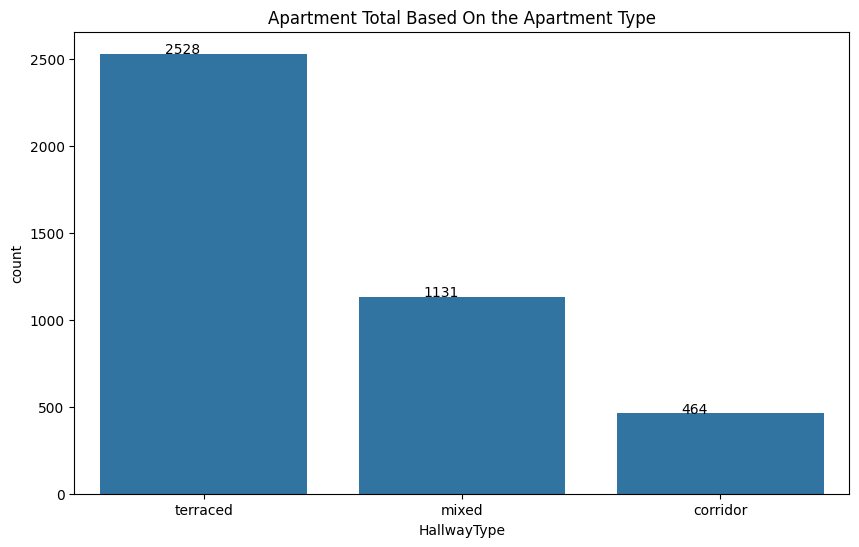

In [16]:
# Apartment total based on the apartment type

plt.figure(figsize = (10,6))
fig = sns.countplot(data = df,x='HallwayType',order = df['HallwayType'].value_counts().index)

for p in fig.patches:
   fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Apartment Total Based On the Apartment Type')
plt.show()

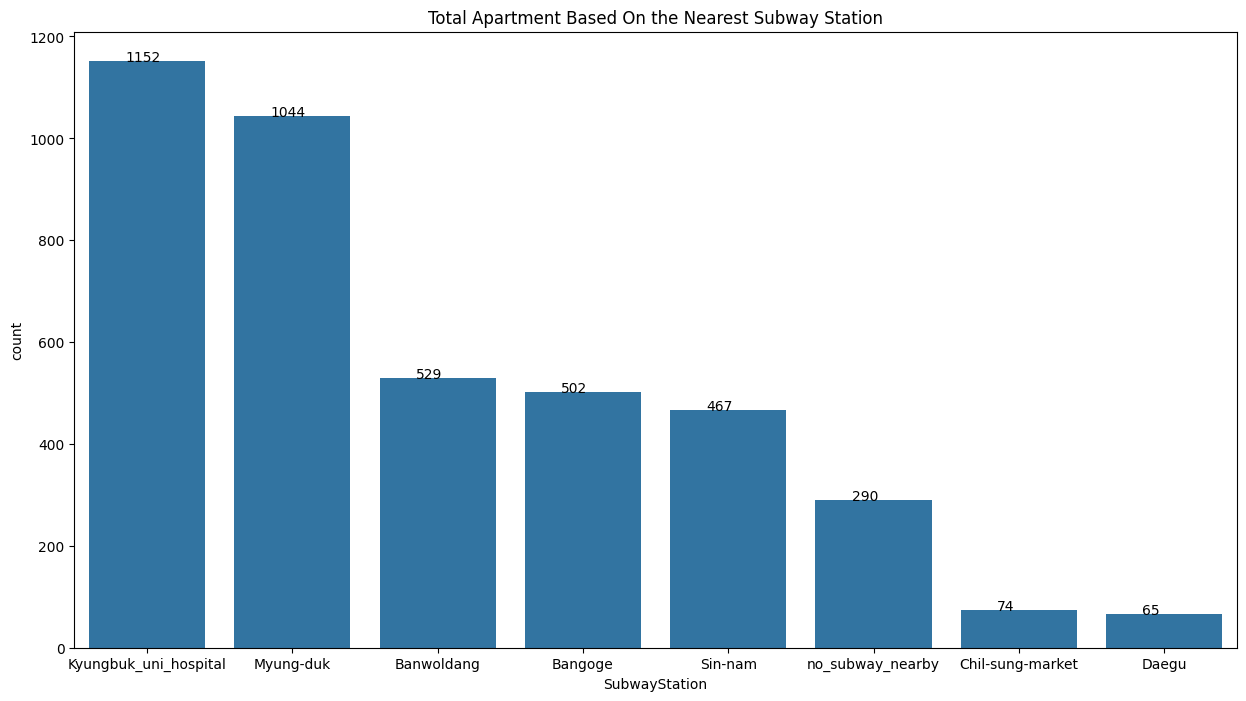

In [17]:
# Total apartment types based on the nearest subway station

plt.figure(figsize = (15,8))
fig=sns.countplot(data=df,x='SubwayStation',order = df['SubwayStation'].value_counts().index)

for p in fig.patches:
   fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Total Apartment Based On the Nearest Subway Station')
plt.show()

The majority of apartments for sale are of the terraced and mixed types. Additionally, most of the apartments are located near Kyungbuk Uni Hospital Station, Myungduk Station, and Banwoldang Station.

**The Relationship Between Apartment Type, Size, and Number of Facilities in the Apartment with the Apartment Price.**

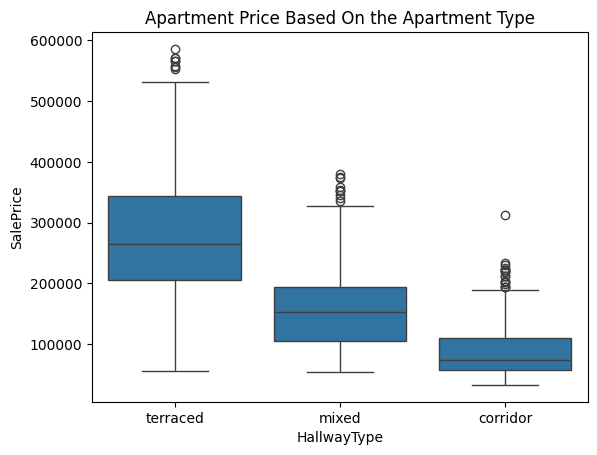

In [18]:
# Apartment price based on apartment type

sns.boxplot(data=df,y='SalePrice',x='HallwayType').set_title('Apartment Price Based On the Apartment Type')

plt.show()

In [19]:
# Median apartment price based on apartment type

df.groupby('HallwayType')['SalePrice'].median().sort_values(ascending=False)


HallwayType
terraced    264601.0
mixed       153539.0
corridor     74557.0
Name: SalePrice, dtype: float64

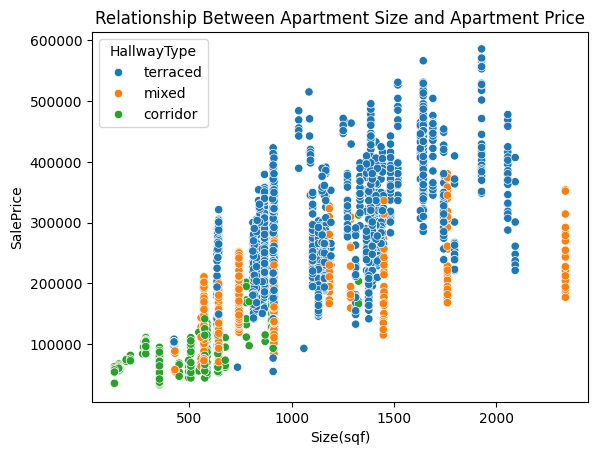

In [20]:
# The relationship between apartment size and apartment price based on apartment type

sns.scatterplot(data=df,x='Size(sqf)',y='SalePrice',hue='HallwayType')
plt.title('Relationship Between Apartment Size and Apartment Price')

plt.show()

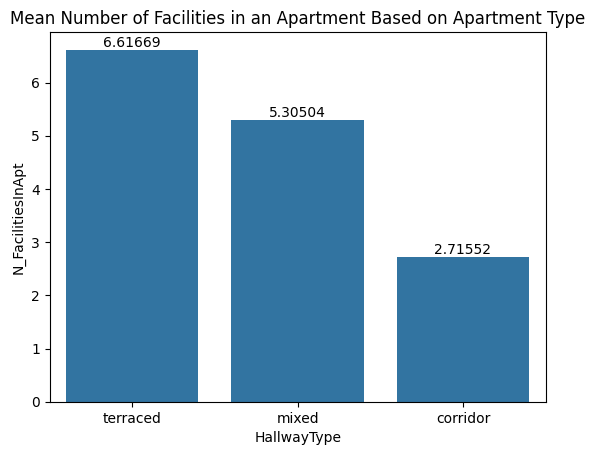

In [21]:
# The relationship between the number of facilities in the apartment and the apartment type

ax=sns.barplot(data=df,y='N_FacilitiesInApt',x='HallwayType',ci=False)

for i in ax.containers:
    ax.bar_label(i,)

plt.title('Mean Number of Facilities in an Apartment Based on Apartment Type')
plt.show()

The larger the apartment size, the higher the price of the apartment. The corridor apartment type is the smallest apartment type, thus having the lowest price compared to the other two apartment types. On the other hand, the mixed and terraced apartment types have a wide range of sizes, from small to large, but the mixed apartment type tends to be cheaper than the terraced apartment type.

The terraced apartment type tends to have more facilities compared to the mixed and corridor apartment types. This could also be one of the reasons why the price of terraced apartments is higher compared to the other two apartment types (1.7 times higher than the mixed apartment type and even 3.5 times higher than the corridor apartment type).

**The Relationship Between the Year of Apartment Build and Apartment Price.**

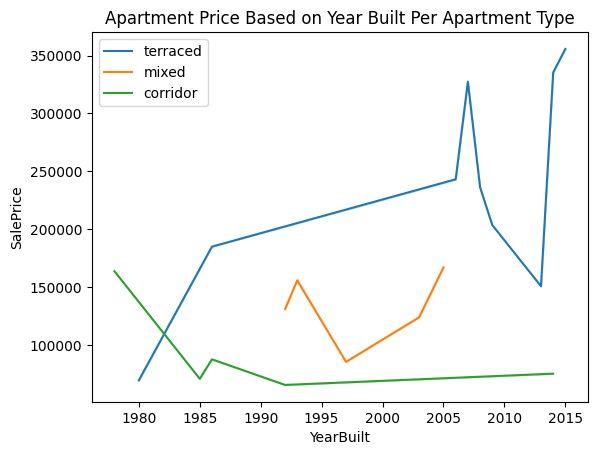

In [22]:
# The relationship between the year of apartment build and apartment price

sns.lineplot(data=df,x='YearBuilt',y='SalePrice',hue='HallwayType',ci=False,estimator=np.median)

plt.legend(loc=2)
plt.ticklabel_format(useOffset=False)
plt.title('Apartment Price Based on Year Built Per Apartment Type')
plt.show()

The mixed apartment type started being built in 1992 but has not been constructed since 2005. The terraced apartment type tends to have higher prices for newly built units. Interestingly, for the corridor apartment type, older units, especially those built in the 1980s, tend to have higher prices.

**The Relationship Between the Nearest Station and Apartment Price.**

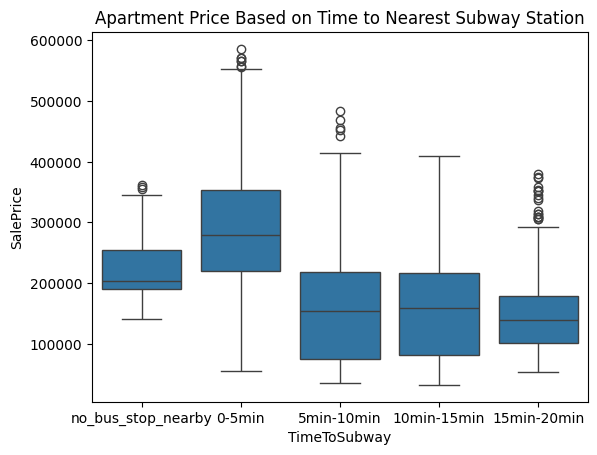

In [23]:
# The relationship between the time to the nearest subway station and apartment price

sns.boxplot(data=df,y='SalePrice',x='TimeToSubway',order=['no_bus_stop_nearby','0-5min','5min-10min','10min-15min','15min-20min']).set_title('Apartment Price Based on Time to Nearest Subway Station')

plt.show()

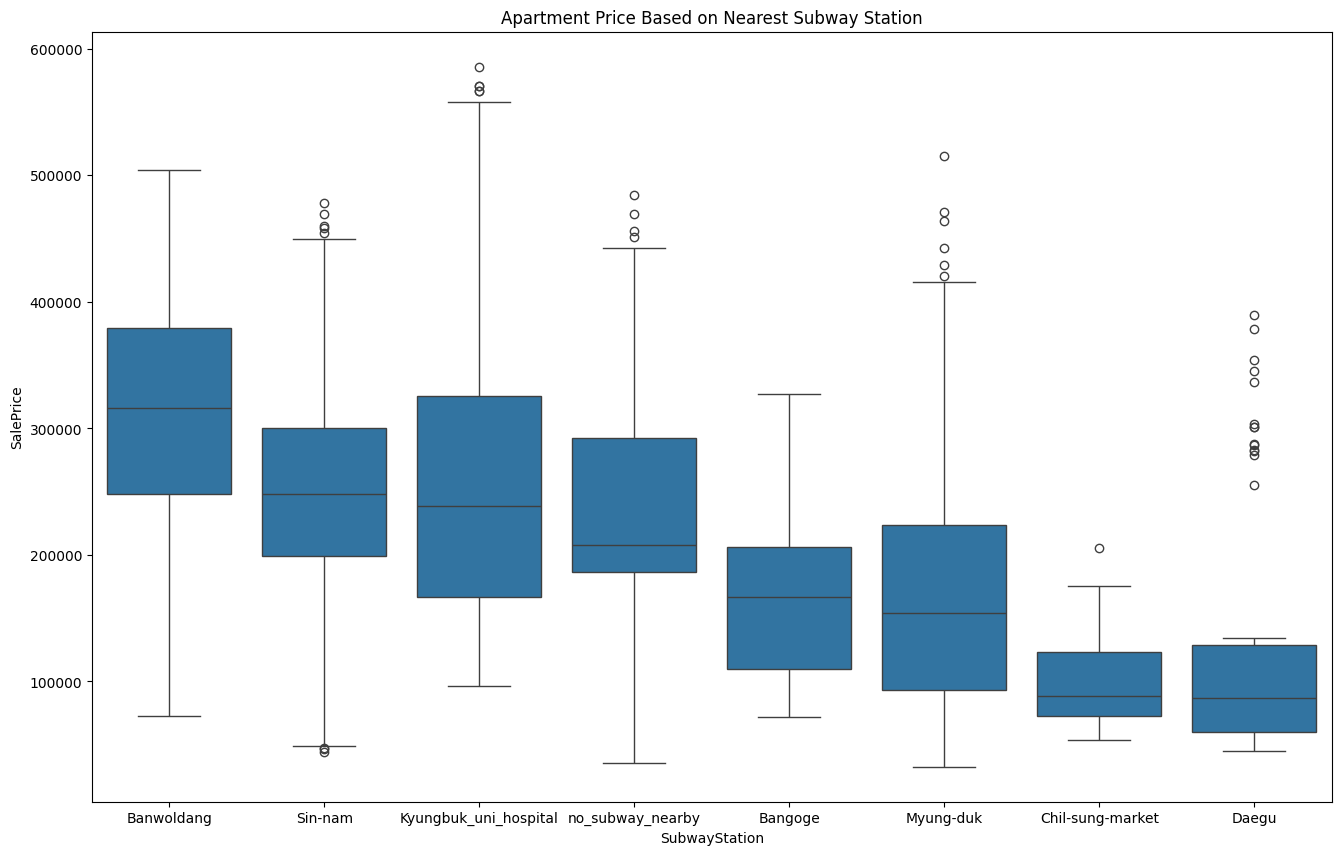

In [24]:
# The relationship between the nearest subway station and apartment price

plt.figure(figsize=(16,10))

station_grouped=df.groupby('SubwayStation')['SalePrice'].median().sort_values(ascending=False)

sns.boxplot(data=df,y='SalePrice',x='SubwayStation',order=station_grouped.index).set_title('Apartment Price Based on Nearest Subway Station')

plt.show()

In [25]:
# The median apartment price based on the time it takes to reach the subway and the nearest subway station

TimeToSubway_grouped=df.groupby('TimeToSubway')['SalePrice'].median().sort_values(ascending=False)
SubwayStation_grouped=df.groupby('SubwayStation')['SalePrice'].median().sort_values(ascending=False)

print(TimeToSubway_grouped)
print(SubwayStation_grouped)

TimeToSubway
0-5min                279646.0
no_bus_stop_nearby    203646.0
10min-15min           159292.0
5min-10min            153539.0
15min-20min           138938.0
Name: SalePrice, dtype: float64
SubwayStation
Banwoldang               315929.0
Sin-nam                  247787.0
Kyungbuk_uni_hospital    238938.0
no_subway_nearby         207743.0
Bangoge                  167035.0
Myung-duk                154424.5
Chil-sung-market          88495.0
Daegu                     86725.0
Name: SalePrice, dtype: float64


<Figure size 1600x1000 with 0 Axes>

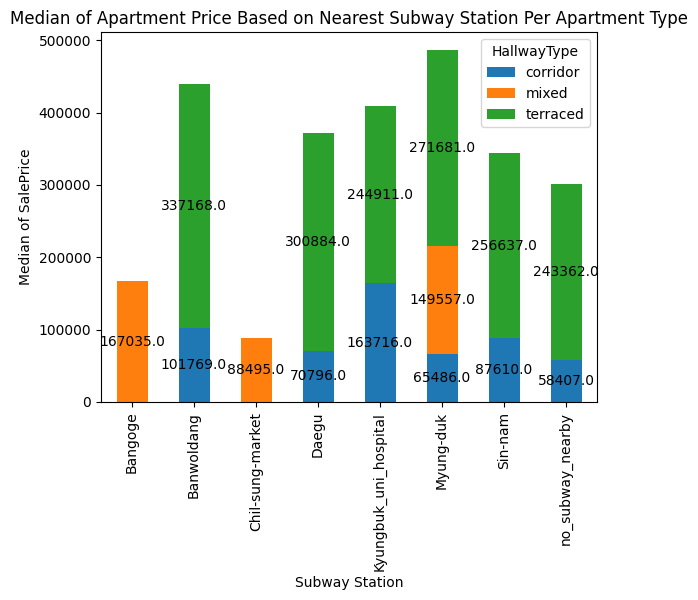

In [26]:
# The median apartment price based on the nearest subway station per apartment type

plt.figure(figsize=(16,10))

pivot=df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')

stacked_plot=pivot.plot(kind='bar',stacked=True)
for i in stacked_plot.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in i]
    stacked_plot.bar_label(i, labels=labels, label_type='center')
plt.xlabel('Subway Station')

plt.ylabel('Median of SalePrice')
plt.title('Median of Apartment Price Based on Nearest Subway Station Per Apartment Type')
plt.show()

The closer an apartment is to a subway station in Daegu, the higher its price tends to be. However, apartments that are not near a station still maintain high prices. This suggests that while the proximity to a station influences the apartment price, other factors also contribute to apartments retaining high prices.

Overall, the three areas with the highest prices are apartments around Banwoldang Station, Sin-nam Station, and Kyungbuk University Hospital. Apartments around Banwoldang Station have prices 3.6 times higher compared to those near Daegu Station, while apartments near Sin-Nam Station and Kyungbuk University Hospital are priced 2.8 times higher than those near Daegu Station.

Based on the median apartment prices by nearest subway station per apartment type, terraced apartments consistently have higher median prices, while corridor apartments always have lower median prices across all areas. This indicates a strong demand for terraced apartment types in all regions.


# **3. Data Preprocessing**



The preprocessing process is a crucial step in data analysis that involves a series of techniques to clean, format, and transform the data into a form that is easier for machine learning models or algorithms to process. Some of the tasks involved in preprocessing are as follows:

* Drop feature: Dropping features that are irrelevant to the problem at hand.
* Handling missing values: Checking for missing data or missing values. If any are found, we need to decide the best way to handle them, such as removing rows or columns with missing values, replacing them with the nearest value (using mean, median, or mode), or using other imputation techniques.
* Handling outliers: Checking for outliers or extreme data points. If any are found, we need to decide the best way to handle them, such as removing them or applying data transformation.

We will use a duplicate dataframe of the original dataframe that was used previously.

In [27]:
# Duplicating the dataframe df

df_model=df.copy()

# **Data Cleaning**
Before analyzing the data, we need to perform data cleaning to address any errors and inconsistencies that may arise, ensuring that the cleaned data is of high quality and ready to be used in the analysis process later.

In [28]:
# The number of rows and columns of the original dataframe

df_model.shape

(4123, 11)

In [29]:
df_model.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [30]:
# Data type, number of missing values, number of unique values, and sample of unique data for each feature

listItem = []
for col in df_model.columns :
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col])) * 100,2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Null Percentage', 'Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,HallwayType,object,0,0.0,3,"[terraced, mixed]"
1,TimeToSubway,object,0,0.0,5,"[15min-20min, no_bus_stop_nearby]"
2,SubwayStation,object,0,0.0,8,"[Daegu, Myung-duk]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[0.0, 1.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[2.0, 0.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[1.0, 3.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[0.0, 1174.0]"
7,YearBuilt,int64,0,0.0,16,"[2009, 2008]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[4, 5]"
9,Size(sqf),int64,0,0.0,89,"[818, 857]"


In general, it can be observed that:
* The dataset contains 4,123 rows and 11 columns.
* There are 3 categorical columns and 8 numerical columns.
* There are no missing values in any of the dataset columns.
* There are no anomalies in the dataset, as based on domain knowledge, the data in the dataset appears to be reasonable.
* Some columns in the data have a value of 0, which can be interpreted as the absence of facilities (such as public offices, universities, basement parking, and others) around the apartment.

In [31]:
# Changing the data type from float to integer

df_model['N_FacilitiesNearBy(ETC)'] = df_model['N_FacilitiesNearBy(ETC)'].astype('int64')
df_model['N_FacilitiesNearBy(PublicOffice)'] = df_model['N_FacilitiesNearBy(PublicOffice)'].astype('int64')
df_model['N_SchoolNearBy(University)'] = df_model['N_SchoolNearBy(University)'].astype('int64')
df_model['N_Parkinglot(Basement)'] = df_model['N_Parkinglot(Basement)'].astype('int64')

We are changing the data type of the columns N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), and N_Parkinglot(Basement) from float to integer because the number of facilities around the apartment must be a whole number.

## **Handling Missing Value**

In [32]:
# Total of missing value

df_model.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

<Axes: >

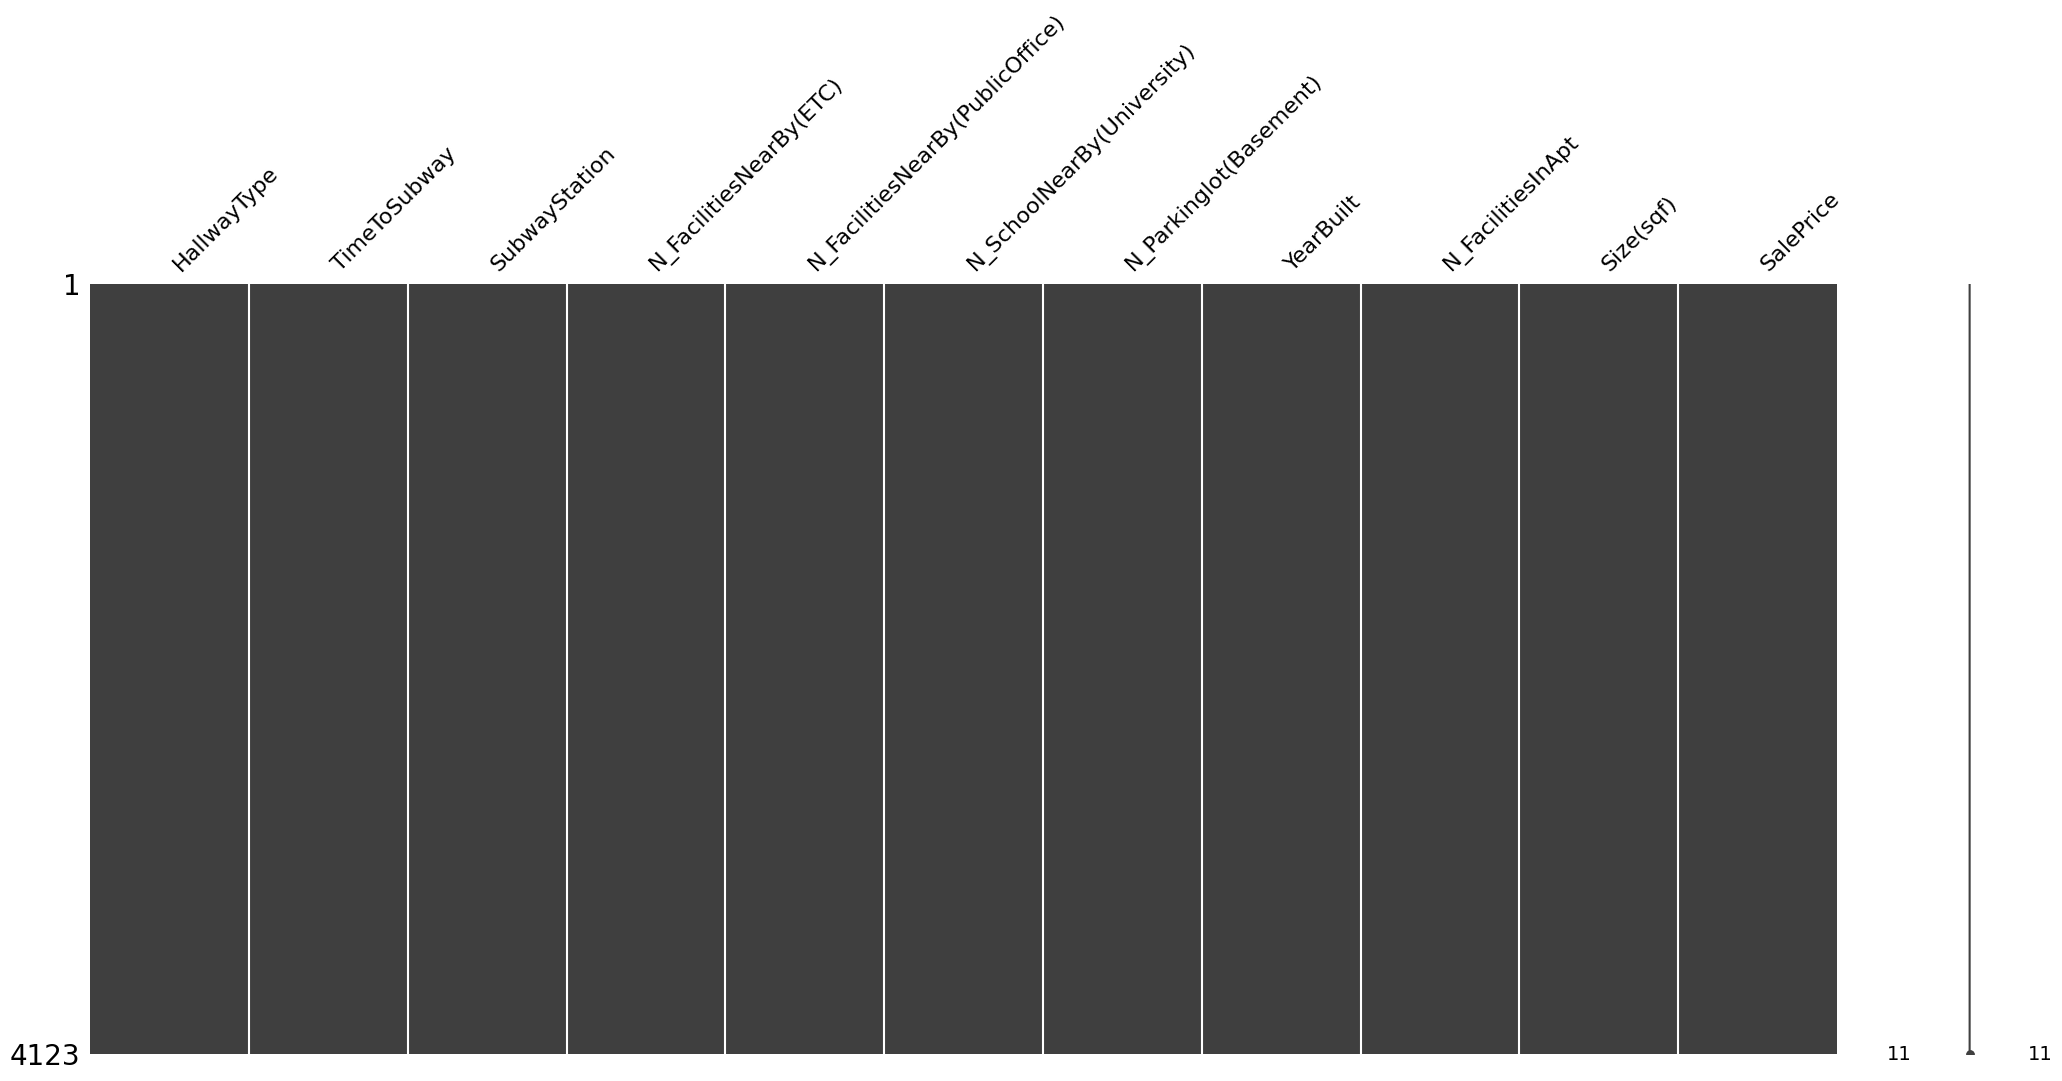

In [33]:
# Heatmap of missing value

msno.matrix(df_model)

Since there are no missing values in any of the dataset columns, no special handling for missing values is required.

## **Check Duplicate**

In [34]:
# Calculating duplicate data

print(f'The number of duplicate data: {df_model.duplicated().sum()}')

The number of duplicate data: 1422


In [35]:
# Extracting duplicate data

df_model.loc[df_model.duplicated(), :]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0,0,0,203,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0,2,2,524,2007,4,1394,256637
133,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min-10min,Daegu,0,3,2,400,2015,7,644,300884
4114,corridor,10min-15min,Myung-duk,5,7,5,0,1992,3,355,86725
4115,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141
4120,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141


In [36]:
# Percentage of duplicate data

print('Percentage of duplicate data:',len(df_model[df_model.duplicated()])/len(df_model))

Percentage of duplicate data: 0.3448944943002668


Since there is no unique column that can serve as an identifier, data with identical values across all columns can be considered duplicate data. There are 1,422 duplicate records in the dataset, which accounts for 34.49% of the data. Duplicate data in a machine learning dataset can lead to bias in the model, causing overfitting because the same data points may be counted multiple times. Therefore, we will drop all duplicate records.

In [37]:
# Drop duplicate data

df_model.drop_duplicates(inplace=True)

In [38]:
# The total number of duplicate data after being dropped

print('The number of duplicate data now:', df_model.duplicated().sum())

The number of duplicate data now: 0


In [39]:
# The number of rows and columns after the duplicate data has been dropped

df_model.shape

(2701, 11)

After the duplicate data has been dropped, there are no more duplicate records, and the dataset now contains 2,701 rows, down from the original 4,123 rows.

## **Drop Unrelevant Column**

We need to check each feature to see if there are any features that are irrelevant to the problem at hand based on domain knowledge.

In [40]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   SubwayStation                     2701 non-null   object
 3   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 5   N_SchoolNearBy(University)        2701 non-null   int64 
 6   N_Parkinglot(Basement)            2701 non-null   int64 
 7   YearBuilt                         2701 non-null   int64 
 8   N_FacilitiesInApt                 2701 non-null   int64 
 9   Size(sqf)                         2701 non-null   int64 
 10  SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 253.2+ KB


All features in the dataset are deemed relevant to the problem at hand, which is to build a model that can predict apartment sale prices in accordance with market prices based on various internal and external factors that influence the price. Additionally, all features are available before making the price prediction. Therefore, no columns will be dropped.

## **Outlier**

An outlier is a data point that differs significantly from most of the other data points. Generally, outliers can have a significant impact on regression models and can distort predictions for the outlier points. Therefore, it is important to investigate outliers and consider whether the existing outliers are valid data points that should be included in the analysis, as well as consider alternative methods for handling outliers before deciding to exclude them from the analysis.

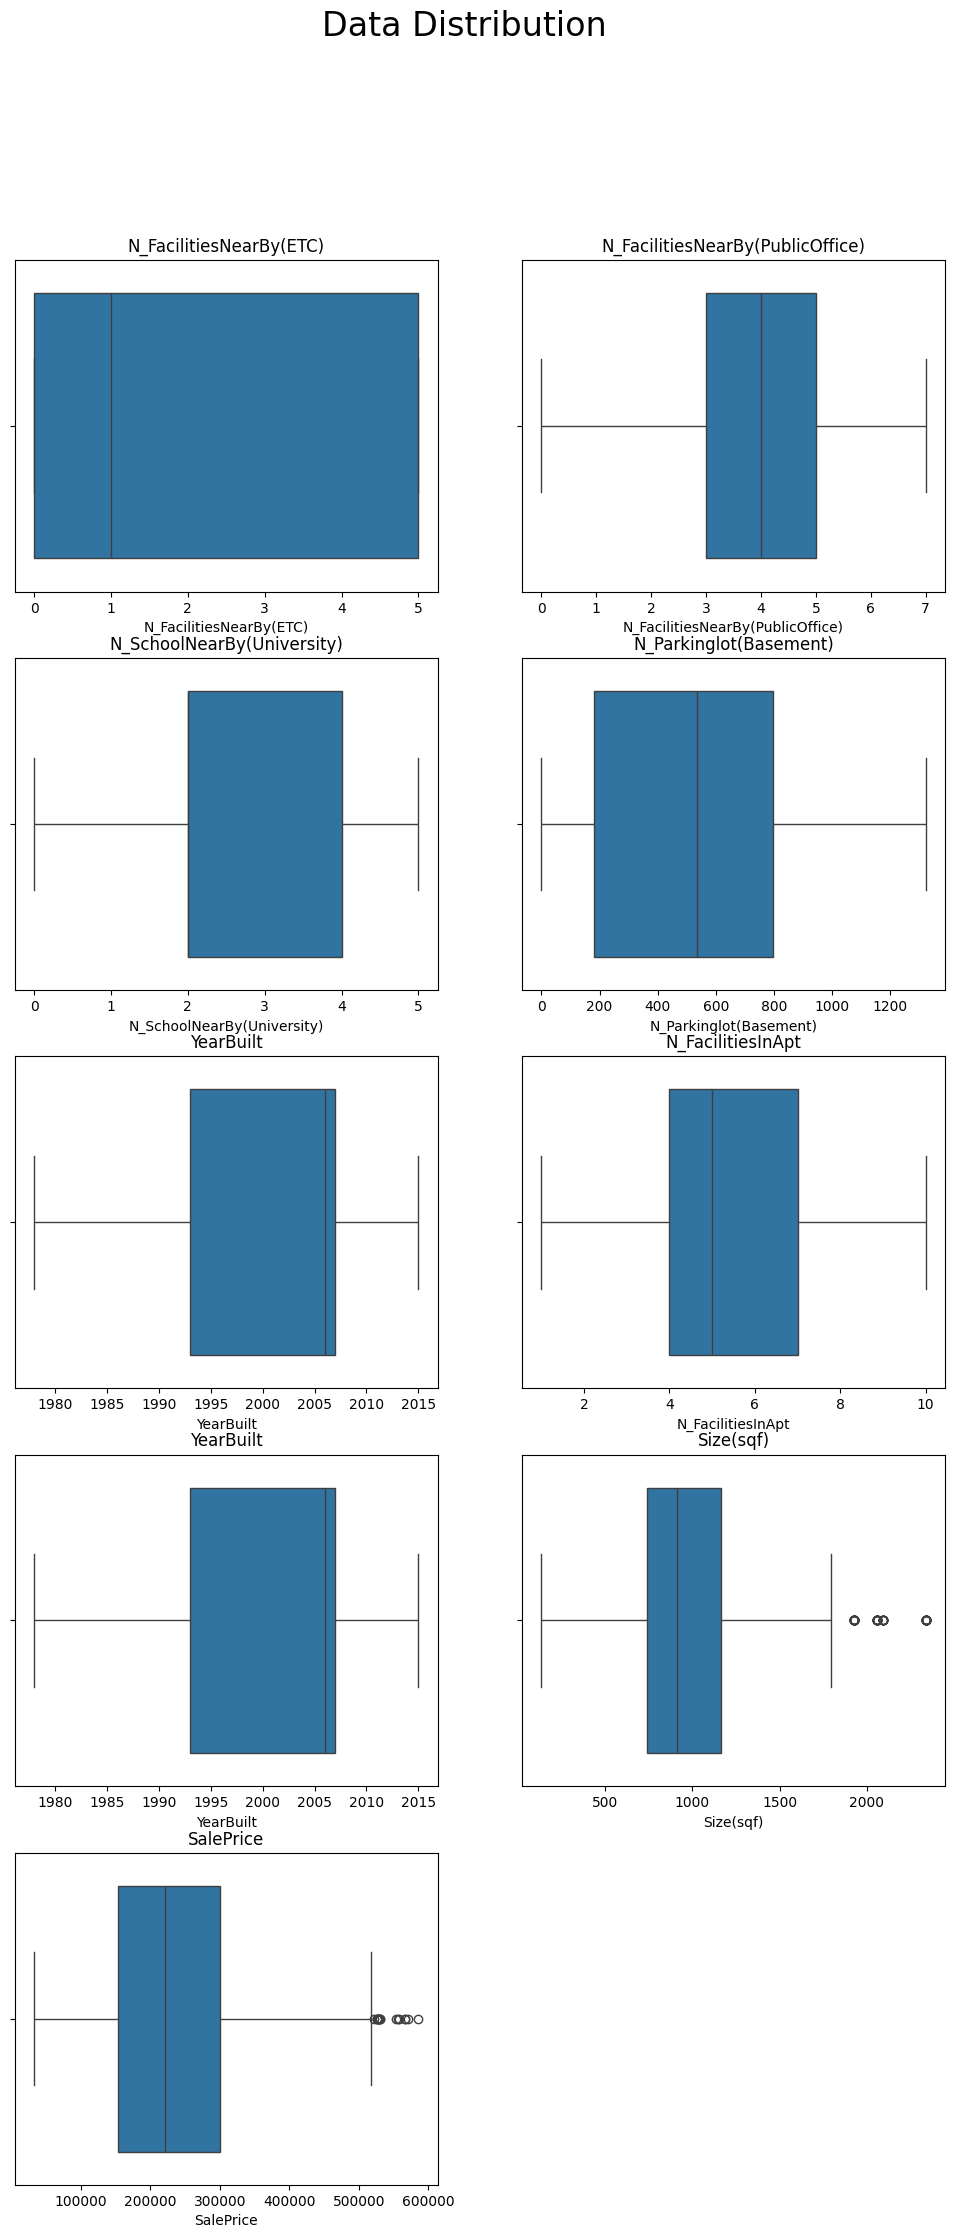

In [41]:
# Boxplot to check for outliers

plt.figure(figsize=(12,25))

columns=['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)','N_Parkinglot(Basement)','YearBuilt','N_FacilitiesInApt','YearBuilt','Size(sqf)','SalePrice']

plotnumber=1
for kolom in columns:
    plt.subplot(5,2,plotnumber)
    sns.boxplot(data=df_model,x=kolom)
    plt.title(kolom)

    plotnumber +=1

plt.suptitle('Data Distribution',size=24)
plt.show()

In [42]:
# Outlier detection

def detect_outliers(df_model):
    outliers = {}
    for col in df_model.columns:
        if df_model[col].dtype in ['int64', 'float64']:
            Q1 = df_model[col].quantile(0.25)
            Q3 = df_model[col].quantile(0.75)
            IQR = Q3-Q1
            lower_bound = Q1-1.5*IQR
            upper_bound = Q3+1.5*IQR
            outliers[col] = len(df_model[(df_model[col]<lower_bound) | (df_model[col]>upper_bound)])
    return outliers
outliers = detect_outliers(df_model)
for col, count in outliers.items():
    print(f'Column: {col}, Outliers total: {count}')

Column: N_FacilitiesNearBy(ETC), Outliers total: 0
Column: N_FacilitiesNearBy(PublicOffice), Outliers total: 0
Column: N_SchoolNearBy(University), Outliers total: 0
Column: N_Parkinglot(Basement), Outliers total: 0
Column: YearBuilt, Outliers total: 0
Column: N_FacilitiesInApt, Outliers total: 0
Column: Size(sqf), Outliers total: 84
Column: SalePrice, Outliers total: 17


Based on the boxplot, the features that have outliers are Size(sqf) (apartment size) and SalePrice (apartment price). The apartment size feature has a total of 84 outliers, while the apartment price feature has 17 outliers.

Now, we will look at the descriptive statistics and distribution of the apartment size and apartment price features to determine the appropriate approach to handle outliers in the regression model.

In [43]:
# Function to detect outlier

def outlier(df_model):
    Q1 = df_model.quantile(0.25)
    Q3 = df_model.quantile(0.75)
    IQR = Q3-Q1
    print(f'''
    IQR: {Q3-Q1}
    Lower bound: {Q1-(1.5*IQR)}
    Upper bound: {Q3+(1.5*IQR)}
    ''')

In [44]:
# Outlier on the apartment size feature

print('Apartment size')
outlier(df_model['Size(sqf)'])

# Outlier on the apartment price feature

print('Apartment price')
outlier(df_model['SalePrice'])

Apartment size

    IQR: 424.0
    Lower bound: 107.0
    Upper bound: 1803.0
    
Apartment price

    IQR: 147345.0
    Lower bound: -67478.5
    Upper bound: 521901.5
    


In [45]:
# Descriptive statistics for the apartment size feature

print('Descriptive Statistics of Apartment Size')
display(df_model['Size(sqf)'].describe())

# Descriptive statistics for the apartment price feature

print('Descriptive Statistics of Apartment Price')
display(df_model['SalePrice'].describe())

Descriptive Statistics of Apartment Size


count    2701.000000
mean      984.028878
std       391.982619
min       135.000000
25%       743.000000
50%       910.000000
75%      1167.000000
max      2337.000000
Name: Size(sqf), dtype: float64

Descriptive Statistics of Apartment Price


count      2701.000000
mean     229511.365790
std      105079.891321
min       32743.000000
25%      153539.000000
50%      221238.000000
75%      300884.000000
max      585840.000000
Name: SalePrice, dtype: float64

In [46]:
# Check the number of data points that exceed the upper limit in the apartment size feature

print('Number of outliers in the apartment size feature:', df_model[df_model['Size(sqf)'] > 1803.0].count()['Size(sqf)'])

# Check the number of data points that exceed the upper limit in the apartment price feature

print('Number of outliers in the apartment price feature:', df_model[df_model['SalePrice'] > 521901.0].count()['SalePrice'])

Number of outliers in the apartment size feature: 84
Number of outliers in the apartment price feature: 17


If outliers are valid and original data points, removing outliers could lead to the loss of important information and affect the overall accuracy of the model. On the other hand, if outliers are caused by measurement errors or other factors that do not reflect the relationship between the dependent and independent variables, then removing the outliers may be necessary.

Based on the descriptive statistics table, even though there are outliers in the apartment size and apartment price features, we will not drop the outliers because they are not caused by incorrect data entry or measurement errors. According to domain knowledge, the existing outliers do represent normal data variations, such as very large house sizes and extremely high house prices.

## **Correlation**

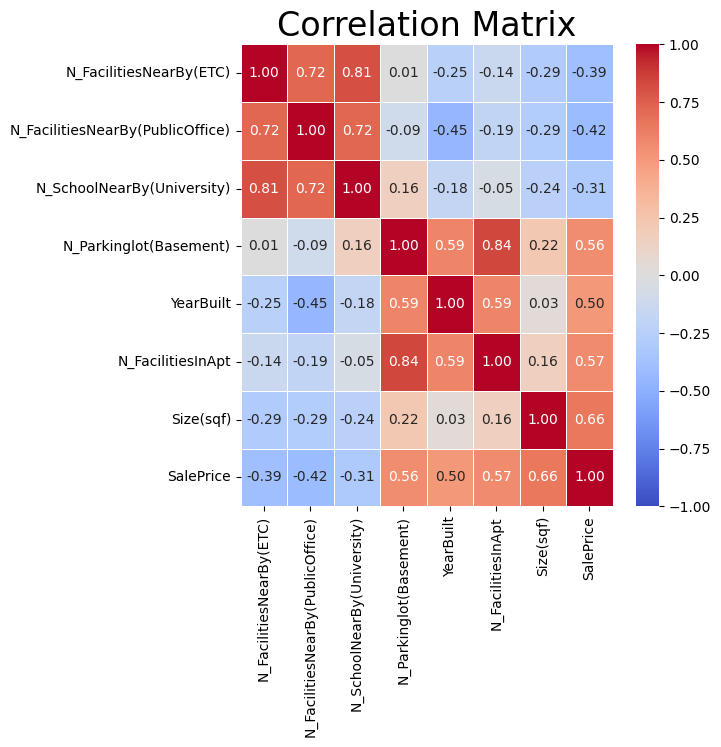

In [47]:
# Correlation matrix

numeric_df = df_model.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(6, 6))
corr = numeric_df.corr(method='pearson')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix', size=24)
plt.show()

* Overall, the correlation matrix shows that all features have a medium correlation (correlation values between 0.3 and 0.7) with apartment prices, meaning all features are related to the apartment price. The highest correlation is held by the apartment size, which has a medium positive correlation, meaning that the apartment size is the feature most related to apartment price, and the larger the apartment, the higher the apartment price.
  
* Other features that also have a medium positive correlation with apartment price are the number of facilities in the apartment, year of construction, and the number of basement parking spots. This indicates that the more facilities in the apartment, the newer the apartment, and the more basement parking spots available, the more expensive the apartment price will be.

* The feature with a medium negative correlation with apartment price is the number of nearby public office facilities, the number of other nearby facilities, and the number of nearby universities. This suggests that the more public office facilities, other facilities, and universities near the apartment, the cheaper the apartment price will be.

* There is a strong correlation between independent variables, specifically between the number of other nearby facilities and the number of nearby universities (correlation value = 0.81), and between the number of other nearby facilities and the number of nearby public office facilities (correlation value = 0.72). This indicates multicollinearity, where two or more independent variables in the model have a high correlation with each other. This can lead to problems in regression analysis using methods like least squares to estimate regression parameters, such as linear regression or logistic regression, because it can affect the interpretation of regression coefficients and lead to unstable estimates.

## **Clean Data**

In [48]:
# Check the first 5 rows of clean data

df_model.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min-15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504


In [49]:
# Check the data type, the number of missing values, the number of unique values, and the sample of unique values for each feature

listItem = []
for col in df_model.columns :
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col])) * 100,2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Null Percentage', 'Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,HallwayType,object,0,0.0,3,"[mixed, corridor]"
1,TimeToSubway,object,0,0.0,5,"[no_bus_stop_nearby, 10min-15min]"
2,SubwayStation,object,0,0.0,8,"[Chil-sung-market, Kyungbuk_uni_hospital]"
3,N_FacilitiesNearBy(ETC),int64,0,0.0,4,"[2, 5]"
4,N_FacilitiesNearBy(PublicOffice),int64,0,0.0,8,"[2, 6]"
5,N_SchoolNearBy(University),int64,0,0.0,6,"[0, 4]"
6,N_Parkinglot(Basement),int64,0,0.0,20,"[930, 1270]"
7,YearBuilt,int64,0,0.0,16,"[2006, 1978]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[8, 4]"
9,Size(sqf),int64,0,0.0,89,"[1060, 1035]"


In [50]:
# Check the information of the clean data

df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   SubwayStation                     2701 non-null   object
 3   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 5   N_SchoolNearBy(University)        2701 non-null   int64 
 6   N_Parkinglot(Basement)            2701 non-null   int64 
 7   YearBuilt                         2701 non-null   int64 
 8   N_FacilitiesInApt                 2701 non-null   int64 
 9   Size(sqf)                         2701 non-null   int64 
 10  SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 253.2+ KB


In [51]:
print('Data before data cleaning process:', df.shape)
print('Data after data cleaning process:',df_model.shape)

Data before data cleaning process: (4123, 11)
Data after data cleaning process: (2701, 11)


After cleaning, the dataset which initially had 4,123 entries now has 2,701 entries. The cleaned dataset can now be used to build a regression model.

# **4. Modeling**

## **Feature Selection**

In [52]:
# Check the names of the independent variables for modeling

df_model.drop(columns='SalePrice').columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')

* All columns in the dataset, namely apartment type, time required to reach the nearest subway station, nearest subway station, number of other nearby facilities, number of nearby public offices, number of nearby universities, number of basement parking spaces, apartment construction year, number of apartment facilities, and apartment size, will be used in building the model because, according to domain knowledge, all features can influence the apartment price.

* Furthermore, the correlation results also show that all features have a medium correlation (correlation values between 0.3 and 0.7) with the apartment price, meaning all features are related to the apartment price. It has also been confirmed that all features are available before the label, which is the apartment price, so all features can be used to predict apartment prices in Daegu, South Korea.

## **Feature Engineering**

In [53]:
# Count the number of unique data points per feature

df_model.nunique()

HallwayType                           3
TimeToSubway                          5
SubwayStation                         8
N_FacilitiesNearBy(ETC)               4
N_FacilitiesNearBy(PublicOffice)      8
N_SchoolNearBy(University)            6
N_Parkinglot(Basement)               20
YearBuilt                            16
N_FacilitiesInApt                     9
Size(sqf)                            89
SalePrice                           838
dtype: int64

Here is the translation of your statement:

**Scaling**  
Scaling is the process of transforming numerical data in a dataset so that its values fall within a certain range, with the goal of improving consistency between variables that have different units or ranges, allowing for a fair comparison between them. In the context of machine learning, scaling is often used in algorithms that are sensitive to differences in data scale, such as regression algorithms. Scaling can also help optimize algorithm performance, reduce computation time, and improve model interpretability.

In the dataset, there are features with significantly different ranges, specifically the features N_Parkinglot(Basement) and Size(Sqf). Therefore, we will apply Robust Scaler to the N_Parkinglot(Basement) and Size(sqf) features, as this method can improve data consistency by handling outliers and skewed data distributions, thus reducing the influence of extreme values on the analysis results.

**Encoding**  
Encoding is the process of converting data from one format to another, usually applied to categorical data to transform it into numerical data before it can be used to train a model.

In the dataset, there are several categorical features, so encoding is required for those categorical variables. The encoding process will be as follows:
* **One-Hot Encoding**: HallwayType, because this feature is a nominal variable with 3 categories (One-Hot Encoding is preferred over Binary Encoding here because the number of categories is not large).
* **Binary Encoding**: SubwayStation, because this feature is a nominal variable with 8 categories (Binary Encoding is preferred over One-Hot Encoding because the number of categories is relatively large, and we want to create fewer dummy variables to reduce overfitting, which could occur if too many variables are used to build the model).
* **Ordinal Encoding**: TimeToSubway, because this feature is an ordinal variable, and the categories in this feature have a natural order based on the time it takes to reach the nearest subway station.

In [54]:
# Scaling and encoding

ordinal_mapping = [
    {'col':'TimeToSubway', 
    'mapping':{'no_bus_stop_nearby':0, '0min-5min':1, '5min-10min':2, '10min-15min':3, '15-20min':4}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_mapping)

transformer = ColumnTransformer([
            ('Robust',RobustScaler(),['N_Parkinglot(Basement)','Size(sqf)']),
            ('OneHotEncoding', OneHotEncoder(drop='first'), ['HallwayType']),
            ('BinaryEncoding', ce.BinaryEncoder(), ['SubwayStation']),
            ('OrdinalEncoding', ce.OrdinalEncoder(), ['TimeToSubway'])
            ], remainder='passthrough')

## **Train Test Splitting**

Before proceeding, we will define the variables X and Y. In regression modeling, X represents the independent variables used to predict the value of Y, the dependent variable. Meanwhile, Y is the dependent variable, or the variable that we want to predict.

* X = HallwayType, TimeToSubway, SubwayStation, N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement), YearBuilt, N_FacilitiesInApt, Size(sqf)
* Y = SalePrice

The data is split into two parts: 80% for training data and 20% for testing data. The training data is used to train the machine learning model, while the testing data is used to evaluate the performance of the trained model.

In [55]:
# Split data

x=df_model.drop(['SalePrice'],axis=1)
y=df_model['SalePrice']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

## **Benchmark Model**

After the dataset has been split into training data and testing data, we will now select a benchmark model to determine the reference model that will be used as a basis for comparison to evaluate the performance of the newly developed model.

## Stand Alone Model

Several regression models that will be used to select the benchmark model are as follows:

* Linear Regression: A model used to model the linear relationship between one or more input variables and the target variable.
* Lasso Regression: A linear regression model used to reduce overfitting by adding the sum of the absolute values of the coefficients as regularization to the linear regression equation, where some coefficients are set to zero, so the model only considers the most important features.
* Ridge Regression: A linear regression model used to reduce overfitting by adding the sum of the squares of the coefficients as regularization to the linear regression equation.
* KNN Regression: A regression model based on the K-Nearest Neighbors (KNN) algorithm, which finds the K nearest neighbors of the input data to be predicted and then predicts the numeric target variable.
* Decision Tree Regression: A regression model in the form of a decision tree structure consisting of a series of nodes and edges.
* Random Forest Regression: A regression model that builds several decision trees randomly by using different subsets of the training data and random subsets of features from the available dataset. Each decision tree is generated using bootstrap sampling and feature bagging techniques.
* XGBoost (Extreme Gradient Boosting) Regression: A regression model that utilizes the gradient boosting technique with an ensemble learning approach.
* Support Vector Regression (SVR): A regression model used to predict target values based on given features or independent variables, with an approach similar to Support Vector Machine (SVM), but aimed at finding the best hyperplane (line or plane) that can separate data in feature space.

K-fold cross-validation is also used as a model performance evaluation method, which involves splitting the dataset into 5 equal partitions. The model will be trained on 4 partitions and tested on the remaining partition. This procedure will be done 5 times with different partitions as the validation and training data, and the model performance will be calculated based on the average performance. This method is useful to avoid overfitting or underfitting and to achieve better model generalization.


In [ ]:
# Stand Alone Model

LinReg=LinearRegression()
Lasso=Lasso(random_state=8)
Ridge=Ridge(random_state=8)
KNN=KNeighborsRegressor()
Tree=DecisionTreeRegressor(random_state=8)
Forest=RandomForestRegressor(random_state=8)
XGBoost=xgb.XGBRegressor()
SVR=SVR()

models=[LinReg,Lasso,Ridge,KNN,Tree,Forest,XGBoost,SVR]

score_R2=[]
mean_R2=[]
std_R2=[]

score_RMSE=[]
mean_RMSE=[]
std_RMSE=[]

score_MAE=[]
mean_MAE=[]
std_MAE=[]

score_MAPE=[]
mean_MAPE=[]
std_MAPE=[]

kfold=KFold(n_splits=5)

for i in models:
    model_pipeline=Pipeline([
    ('preprocess',transformer),
    ('model',i)
    ])

    # R-Squared
    model_cv_R2=cross_val_score(model_pipeline,x_train,y_train,cv=kfold,scoring='r2')
    score_R2.append(model_cv_R2)
    mean_R2.append(model_cv_R2.mean())
    std_R2.append(model_cv_R2.std())

    # RMSE
    model_cv_RMSE=cross_val_score(model_pipeline,x_train,y_train,cv=kfold,scoring='neg_root_mean_squared_error')
    score_RMSE.append(model_cv_RMSE)
    mean_RMSE.append(model_cv_RMSE.mean())
    std_RMSE.append(model_cv_RMSE.std())

    # MAE
    model_cv_MAE=cross_val_score(model_pipeline,x_train,y_train,cv=kfold,scoring='neg_mean_absolute_error')
    score_MAE.append(model_cv_MAE)
    mean_MAE.append(model_cv_MAE.mean())
    std_MAE.append(model_cv_MAE.std())

    # MAPE
    model_cv_MAPE=cross_val_score(model_pipeline,x_train,y_train,cv=kfold,scoring='neg_mean_absolute_percentage_error')
    score_MAPE.append(model_cv_MAPE)
    mean_MAPE.append(model_cv_MAPE.mean())
    std_MAPE.append(model_cv_MAPE.std())

In [138]:
# Evaluation result

kfold=pd.DataFrame({
    'Model': ['Linear Regression','Lasso','Ridge','KNN','Decision Tree','Random Forest','XGBoost','SVR'],
    'Mean R2': mean_R2,
    'Standar Deviasi R2': std_R2,
    'Mean RMSE': mean_RMSE,
    'Standard Deviasi RMSE': std_RMSE,
    'Mean MAE': mean_MAE,
    'Standard Deviasi MAE': std_MAE,
    'Mean MAPE': mean_MAPE,
    'Standard Deviasi MAPE': std_MAPE
}).set_index('Model').sort_values(by='Mean MAPE',ascending=False)

kfold

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Random Forest,0.800099,0.011443,-46886.208031,1317.605751,-37806.336434,1138.499990,-0.193504,0.006105
Decision Tree,0.798259,0.013279,-47087.515123,1300.498052,-37947.755779,1130.649391,-0.194256,0.005240
XGBoost,0.797535,0.011146,-47191.030367,1397.766177,-37968.766175,1157.432791,-0.194465,0.005768
KNN,0.774594,0.023109,-49723.325085,2220.330989,-39551.981667,1556.834268,-0.200127,0.004756
Linear Regression,0.747164,0.013894,-52745.035768,1878.070531,-42864.921834,1643.017092,-0.218745,0.006732
Lasso,0.747166,0.013898,-52744.730927,1878.451883,-42865.266868,1642.985130,-0.218753,0.006729
Ridge,0.747187,0.013932,-52742.456300,1881.144541,-42871.407887,1642.280859,-0.218889,0.006694
SVR,-0.010024,0.010113,-105486.981619,3389.768007,-85121.435816,2656.012734,-0.557795,0.034506


## Voting and Stacking

Additionally, we will also try to combine several different regression models to improve prediction performance. In this technique, multiple regression models are trained on the same training data, and then the predictions from each model are combined to provide the final prediction.

We will not use the SVR model because, based on the previous evaluation results, the SVR model has much higher mean RMSE, MAE, and MAPE values compared to other models, which indicates that the prediction quality of the SVR model is not good.

## Voting Regressor

In [140]:
# Voting Regressor

LinReg=LinearRegression()
Lasso=Lasso(random_state=8)
Ridge=Ridge(random_state=8)
KNN=KNeighborsRegressor()
Tree=DecisionTreeRegressor(random_state=8)
Forest=RandomForestRegressor(random_state=8)
XGBoost=xgb.XGBRegressor()

vc=VotingRegressor([
  ('model1',LinReg),
  ('model2',Lasso),
  ('model3',Ridge),
  ('model4',KNN),
  ('model5',Tree),
  ('model6',Forest),
  ('model7',XGBoost)
])

score_R2_voting=[]
mean_R2_voting=[]
std_R2_voting=[]

score_RMSE_voting=[]
mean_RMSE_voting=[]
std_RMSE_voting=[]

score_MAE_voting=[]
mean_MAE_voting=[]
std_MAE_voting=[]

score_MAPE_voting=[]
mean_MAPE_voting=[]
std_MAPE_voting=[]

kfold=KFold(n_splits=5)

model_pipeline3=Pipeline([
('preprocess',transformer),
('model',vc)
])

# R-Squared
model_cv_R2_voting=cross_val_score(model_pipeline3,x_train,y_train,cv=kfold,scoring='r2')
score_R2_voting.append(model_cv_R2_voting)
mean_R2_voting.append(model_cv_R2_voting.mean())
std_R2_voting.append(model_cv_R2_voting.std())

# RMSE
model_cv_RMSE_voting=cross_val_score(model_pipeline3,x_train,y_train,cv=kfold,scoring='neg_root_mean_squared_error')
score_RMSE_voting.append(model_cv_RMSE_voting)
mean_RMSE_voting.append(model_cv_RMSE_voting.mean())
std_RMSE_voting.append(model_cv_RMSE_voting.std())

# MAE
model_cv_MAE_voting=cross_val_score(model_pipeline3,x_train,y_train,cv=kfold,scoring='neg_mean_absolute_error')
score_MAE_voting.append(model_cv_MAE_voting)
mean_MAE_voting.append(model_cv_MAE_voting.mean())
std_MAE_voting.append(model_cv_MAE_voting.std())

# MAPE
model_cv_MAPE_voting=cross_val_score(model_pipeline3,x_train,y_train,cv=kfold,scoring='neg_mean_absolute_percentage_error')
score_MAPE_voting.append(model_cv_MAPE_voting)
mean_MAPE_voting.append(model_cv_MAPE_voting.mean())
std_MAPE_voting.append(model_cv_MAPE_voting.std())
    

In [141]:
# Voting evaluation result

kfold_voting=pd.DataFrame({
    'Model': ['Voting Regressor'],
    'Mean R2': mean_R2_voting,
    'Standar Deviasi R2': std_R2_voting,
    'Mean RMSE': mean_RMSE_voting,
    'Standard Deviasi RMSE': std_RMSE_voting,
    'Mean MAE': mean_MAE_voting,
    'Standard Deviasi MAE': std_MAE_voting,
    'Mean MAPE': mean_MAPE_voting,
    'Standard Deviasi MAPE': std_MAPE_voting
}).set_index('Model')

kfold_voting

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Voting Regressor,0.793315,0.013152,-47672.170374,1553.045927,-38956.862164,1086.188637,-0.199363,0.005449


## Stacking Regressor

In [144]:
# Stacking Regressor

LinReg=LinearRegression()
Lasso=Lasso(random_state=8)
Ridge=Ridge(random_state=8)
KNN=KNeighborsRegressor()
Tree=DecisionTreeRegressor(random_state=8)
Forest=RandomForestRegressor(random_state=8)
XGBoost=xgb.XGBRegressor()

sc=StackingRegressor([
  ('model1',LinReg),
  ('model2',Lasso),
  ('model3',Ridge),
  ('model4',KNN),
  ('model5',Tree),
  ('model6',Forest),
  ('model7',XGBoost)
],final_estimator=XGBoost)

score_R2_stacking=[]
mean_R2_stacking=[]
std_R2_stacking=[]

score_RMSE_stacking=[]
mean_RMSE_stacking=[]
std_RMSE_stacking=[]

score_MAE_stacking=[]
mean_MAE_stacking=[]
std_MAE_stacking=[]

score_MAPE_stacking=[]
mean_MAPE_stacking=[]
std_MAPE_stacking=[]

kfold=KFold(n_splits=5)

model_pipeline4=Pipeline([
('preprocess',transformer),
('model',sc)
])

# R-Squared
model_cv_R2_stacking=cross_val_score(model_pipeline4,x_train,y_train,cv=kfold,scoring='r2')
score_R2_stacking.append(model_cv_R2_stacking)
mean_R2_stacking.append(model_cv_R2_stacking.mean())
std_R2_stacking.append(model_cv_R2_stacking.std())

# RMSE
model_cv_RMSE_stacking=cross_val_score(model_pipeline4,x_train,y_train,cv=kfold,scoring='neg_root_mean_squared_error')
score_RMSE_stacking.append(model_cv_RMSE_stacking)
mean_RMSE_stacking.append(model_cv_RMSE_stacking.mean())
std_RMSE_stacking.append(model_cv_RMSE_stacking.std())

# MAE
model_cv_MAE_stacking=cross_val_score(model_pipeline4,x_train,y_train,cv=kfold,scoring='neg_mean_absolute_error')
score_MAE_stacking.append(model_cv_MAE_stacking)
mean_MAE_stacking.append(model_cv_MAE_stacking.mean())
std_MAE_stacking.append(model_cv_MAE_stacking.std())

# MAPE
model_cv_MAPE_stacking=cross_val_score(model_pipeline4,x_train,y_train,cv=kfold,scoring='neg_mean_absolute_percentage_error')
score_MAPE_stacking.append(model_cv_MAPE_stacking)
mean_MAPE_stacking.append(model_cv_MAPE_stacking.mean())
std_MAPE_stacking.append(model_cv_MAPE_stacking.std())

In [145]:
# Stacking evaluation result

kfold_stacking=pd.DataFrame({
    'Model': ['Stacking Regressor'],
    'Mean R2': mean_R2_stacking,
    'Standar Deviasi R2': std_R2_stacking,
    'Mean RMSE': mean_RMSE_stacking,
    'Standard Deviasi RMSE': std_RMSE_stacking,
    'Mean MAE': mean_MAE_stacking,
    'Standard Deviasi MAE': std_MAE_stacking,
    'Mean MAPE': mean_MAPE_stacking,
    'Standard Deviasi MAPE': std_MAPE_stacking
}).set_index('Model')

kfold_stacking

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Stacking Regressor,0.784351,0.011867,-48724.011741,2005.176835,-38959.723537,1761.810809,-0.199858,0.007545


## Summary

Here is a summary of the evaluation results from all the models used:

In [146]:
# Summary of the evaluation results from all the models used

summary=pd.DataFrame({
        'Model':['Linear Regression','Lasso Regression','Ridge Regression','KNN Regressor','Decision Tree Regressor','Random Forest Regressor','XGBoost Regressor','SVR','Voting Regressor','Stacking Regressor'],
        'Mean R2': mean_R2+mean_R2_voting+mean_R2_stacking,
        'Standar Deviasi R2': std_R2+std_R2_voting+std_R2_stacking,
        'Mean RMSE': mean_RMSE+mean_RMSE_voting+mean_RMSE_stacking,
        'Standard Deviasi RMSE':  std_RMSE+std_RMSE_voting+std_RMSE_stacking,
        'Mean MAE': mean_MAE+mean_MAE_voting+mean_MAE_stacking,
        'Standard Deviasi MAE':  std_MAE+std_MAE_voting+std_MAE_stacking,
        'Mean MAPE': mean_MAPE+mean_MAPE_voting+mean_MAPE_stacking,
        'Standard Deviasi MAPE':  std_MAPE+std_MAPE_voting+std_MAPE_stacking}).set_index('Model').sort_values(by='Mean MAPE',ascending=False)
summary

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Random Forest Regressor,0.800099,0.011443,-46886.208031,1317.605751,-37806.336434,1138.499990,-0.193504,0.006105
Decision Tree Regressor,0.798259,0.013279,-47087.515123,1300.498052,-37947.755779,1130.649391,-0.194256,0.005240
XGBoost Regressor,0.797535,0.011146,-47191.030367,1397.766177,-37968.766175,1157.432791,-0.194465,0.005768
Voting Regressor,0.793315,0.013152,-47672.170374,1553.045927,-38956.862164,1086.188637,-0.199363,0.005449
Stacking Regressor,0.784351,0.011867,-48724.011741,2005.176835,-38959.723537,1761.810809,-0.199858,0.007545
KNN Regressor,0.774594,0.023109,-49723.325085,2220.330989,-39551.981667,1556.834268,-0.200127,0.004756
Linear Regression,0.747164,0.013894,-52745.035768,1878.070531,-42864.921834,1643.017092,-0.218745,0.006732
Lasso Regression,0.747166,0.013898,-52744.730927,1878.451883,-42865.266868,1642.985130,-0.218753,0.006729
Ridge Regression,0.747187,0.013932,-52742.456300,1881.144541,-42871.407887,1642.280859,-0.218889,0.006694


Based on the evaluation results above, the Random Forest Regressor, Decision Tree Regressor, XGBoost Regressor, and Voting Regressor models have the smallest mean RMSE, mean MAE, and mean MAPE values compared to the other models, with Random Forest Regressor being the best model. The smaller the RMSE, MAE, and MAPE values, the better the prediction quality of the model. Additionally, the standard deviation values of RMSE, MAE, and MAPE are also relatively small, indicating consistent results.

Therefore, Random Forest Regressor, Decision Tree Regressor, XGBoost Regressor, and Voting Regressor are the top 4 benchmark models and will be used for prediction on the testing data.

## Prediction on Testing Data with the Top 4 Benchmark Models

In [149]:
# Top 4 benchmark model

LinReg=LinearRegression()
Lasso=Lasso(random_state=8)
Ridge=Ridge(random_state=8)
KNN=KNeighborsRegressor()
Tree=DecisionTreeRegressor(random_state=8)
Forest=RandomForestRegressor(random_state=8)
XGBoost=xgb.XGBRegressor()

models={
    'Random Forest':RandomForestRegressor(random_state=8),
    'Decision Tree':DecisionTreeRegressor(random_state=8),
    'XGBoost':xgb.XGBRegressor(),
    'Voting Regression':VotingRegressor([('model1',LinReg),('model2',Lasso),('model3',Ridge),('model4',KNN),('model5',Tree),('model6',Forest),('model7',XGBoost)])
}

score_R2=[]
score_RMSE=[]
score_MAE=[]
score_MAPE=[]

for i in models:
    model=Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)

    score_R2.append(r2_score(y_test, y_pred))
    score_RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_MAE.append(mean_absolute_error(y_test, y_pred))
    score_MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning=pd.DataFrame({'R2':score_R2,'RMSE': score_RMSE, 'MAE': score_MAE, 'MAPE': score_MAPE}, index=models.keys()).sort_values(by='MAPE')

score_before_tuning

,R2,RMSE,MAE,MAPE
Decision Tree,0.813620,45190.336877,36691.559723,0.189233
XGBoost,0.813523,45202.047489,36709.822024,0.189525
Random Forest,0.812731,45297.907094,36726.965487,0.190773
Voting Regression,0.808860,45763.667426,37498.779851,0.196376


After making predictions on the testing data, the Decision Tree Regressor model is the best model because it has the smallest mean RMSE, mean MAE, and mean MAPE values compared to the other models.

## Hyperparameter Tuning

Now, we will perform hyperparameter tuning to find the best combination of parameters for a machine learning model with the aim of improving its performance and accuracy. Based on the metrics used, the Random Forest Regressor model is the best performing model during cross-validation, while the Decision Tree Regressor model performs the best when making predictions on the testing data.

Therefore, we will perform hyperparameter tuning on both models, the Random Forest Regressor and Decision Tree Regressor, to improve their performance and ultimately select the best final model.

### **Random Forest Regressor Model**

Random Forest is an ensemble method that combines machine learning models like Decision Trees with different data characteristics, aiming to reduce the variance in prediction values and make the prediction results more stable, where the final prediction result is obtained from a majority vote. In Random Forest, we randomly select candidate features to be used in each tree split.

Here are the parameters that will be used during the hyperparameter tuning of the Random Forest model:
* n_estimators: The number of decision trees built in the random forest.  
  During hyperparameter tuning, the values will range from 1 to 1000.
* criterion: The function used to measure the quality of a split. The commonly used criteria for regression are MSE, MAE, Friedman MSE, and Poisson.  
* max_depth: The maximum depth of each decision tree in the random forest. The deeper the decision tree, the higher the chance of overfitting.  
  During hyperparameter tuning, the values will range from 1 to 50.
* max_features: The maximum number of features used in each decision tree to split a node. Using fewer features will reduce the chances of overfitting.  
* min_samples_split: The minimum number of data points required to split a node. A larger value of min_samples_split will reduce the number of node splits, thus reducing overfitting, but if the value is too large, it may lead to underfitting.  
  During hyperparameter tuning, the values will range from 2 to 20.
* min_samples_leaf: The minimum number of samples required at each leaf in the decision tree. A larger value of min_samples_leaf will result in fewer nodes and can reduce overfitting, but if the value is too large, it may cause underfitting.  
  During hyperparameter tuning, the values will range from 1 to 20.

In [71]:
# Hyperparameter Random Forest

hyperparam_forest={
        'modeling__n_estimators': list(np.arange(1,1001)),
        'modeling__criterion':['absolute_error','squared_error','friedman_mse','poisson'],
        'modeling__max_depth':[np.arange(1,51),None],
        'modeling__max_features':['auto','sqrt','log2',None],
        'modeling__min_samples_split':list(np.arange(2,21)),
        'modeling__min_samples_leaf':list(np.arange(1,21))
}

Randomized search is a method for exploring hyperparameter combinations in a model randomly. Once the optimal hyperparameters are found, the model can be retrained with those optimized hyperparameters.

We will use randomized search instead of grid search because randomized search is more effective in reducing the time required to find the right hyperparameters.

In [166]:
# Algorithm (benchmark model)

Forest=RandomForestRegressor(random_state=8)

pipe_model_forest = Pipeline([
        ('preprocessing', transformer),
        ('modeling', Forest)
 ])

kfold=KFold(n_splits=5)

# RandomizedSearch

randomsearch_forest=RandomizedSearchCV(
        estimator=pipe_model_forest,              # Model to be tuned
        param_distributions=hyperparam_forest,    # Hyperparameter
        cv=kfold,                                 # 5 fold cross validation
        scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
        n_jobs=-1,                                # Maximize processor
        refit='neg_mean_absolute_percentage_error',
        random_state=8
)

In [167]:
# Fit the model with hyperparameter tuning on the training data

randomsearch_forest.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Robust',
                                                                               RobustScaler(),
                                                                               ['N_Parkinglot(Basement)',
                                                                                'Size(sqf)']),
                                                                              ('OneHotEncoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('Binary

In [168]:
# Hyperparameter tuning results in the form of a dataframe sorted by MAPE

pd.DataFrame(randomsearch_forest.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__n_estimators,param_modeling__min_samples_split,param_modeling__min_samples_leaf,param_modeling__max_features,param_modeling__max_depth,param_modeling__criterion,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
1,3.594521,0.159728,0.256011,0.021849,954,17,2,sqrt,None,squared_error,...,1079.507386,1,-0.188826,-0.204805,-0.192690,-0.200824,-0.187507,-0.194930,0.006777,3
7,1.800758,0.032561,0.128572,0.005376,454,19,1,log2,None,poisson,...,1099.545970,4,-0.187388,-0.211523,-0.195744,-0.205142,-0.194375,-0.198834,0.008500,4
2,0.619870,0.012945,0.064513,0.004821,166,15,14,log2,None,friedman_mse,...,996.439995,5,-0.193398,-0.219481,-0.207469,-0.210642,-0.198470,-0.205892,0.009175,5
6,17.146301,0.276726,0.148896,0.014668,584,12,8,sqrt,None,absolute_error,...,1331.087055,2,-0.183953,-0.203074,-0.187156,-0.195824,-0.181612,-0.190324,0.007992,1
9,71.776114,9.652502,0.151470,0.033682,893,20,19,auto,None,absolute_error,...,1164.065481,3,-0.188313,-0.204790,-0.193437,-0.197528,-0.183995,-0.193612,0.007224,2
3,2.460540,0.060071,0.106666,0.007674,331,20,9,auto,None,poisson,...,1569.381718,6,-0.192762,-0.224118,-0.202740,-0.211064,-0.205163,-0.207169,0.010331,6
0,0.764953,0.036812,0.000000,0.000000,556,20,8,log2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",poisson,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,0.355179,0.015401,0.000000,0.000000,372,10,13,auto,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",absolute_error,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.701408,0.025197,0.000000,0.000000,809,16,11,sqrt,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",poisson,...,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.620458,0.016070,0.000000,0.000000,734,13,17,auto,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",squared_error,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [169]:
# Best parameter

print('Parameter terbaik:')
randomsearch_forest.best_params_

Parameter terbaik:


{'modeling__n_estimators': 584,
 'modeling__min_samples_split': 12,
 'modeling__min_samples_leaf': 8,
 'modeling__max_features': 'sqrt',
 'modeling__max_depth': None,
 'modeling__criterion': 'absolute_error'}

In [170]:
# Best score 

print(f'Nilai MAPE setelah hyperparameter tuning: {randomsearch_forest.best_score_}')

Nilai MAPE setelah hyperparameter tuning: -0.19032368120796808


### Prediction on the Testing Data with the Tuned Random Forest Model

Now, we will make predictions on the testing data using the Random Forest model that has undergone hyperparameter tuning to evaluate the model's performance.

In [171]:
model = {'Random Forest': RandomForestRegressor(random_state=8)}

# Define the model based on the best estimator
forest_tuning = randomsearch_forest.best_estimator_

# Fitting the model
forest_tuning.fit(x_train, y_train)

# Prediction on the testing data
y_pred_forest_tuning = forest_tuning.predict(x_test)

nilai_R2_forest_tuning=r2_score(y_test, y_pred_forest_tuning)
nilai_RMSE_forest_tuning=np.sqrt(mean_squared_error(y_test, y_pred_forest_tuning))
nilai_MAE_forest_tuning=mean_absolute_error(y_test, y_pred_forest_tuning)
nilai_MAPE_forest_tuning=mean_absolute_percentage_error(y_test, y_pred_forest_tuning)

score_after_tuning_forest=pd.DataFrame({'R2': nilai_R2_forest_tuning, 'RMSE': nilai_RMSE_forest_tuning, 'MAE': nilai_MAE_forest_tuning, 'MAPE': nilai_MAPE_forest_tuning}, index=model.keys())
score_after_tuning_forest

,R2,RMSE,MAE,MAPE
Random Forest,0.791238,47826.803944,37106.277942,0.196933


### Comparison of the Random Forest Model Performance Before and After Hyperparameter Tuning

In [172]:
# Before hyperparameter tuning

pd.DataFrame(score_before_tuning.loc['Random Forest']).T

,R2,RMSE,MAE,MAPE
Random Forest,0.812731,45297.907094,36726.965487,0.190773


In [173]:
# After hyperparameter tuning

score_after_tuning_forest

,R2,RMSE,MAE,MAPE
Random Forest,0.791238,47826.803944,37106.277942,0.196933


The performance of the Random Forest model on the testing data after hyperparameter tuning did not show improvement, as the RMSE, MAE, and MAPE values increased after hyperparameter tuning. This indicates that the prediction error values are larger, and the model failed to make more accurate predictions.

Therefore, we will now try to perform hyperparameter tuning on the Decision Tree model, which showed the best performance when predicted on the testing data.

### **Model Decision Tree Regressor**
 
The Decision Tree Regressor is a machine learning algorithm that uses a tree structure to split data into smaller and more homogeneous groups based on feature values, and each node in the tree predicts the average target value of the data group that enters that node.

The process of creating a Decision Tree Regressor starts by splitting the data into two groups based on the value of a selected feature, and each group is then split into two more groups based on the value of another feature. This process is repeated until a stopping condition is met. Once the tree is built, predictions are made by passing the data through the tree and selecting the average target value from the node that corresponds to the feature values.

There are several parameters in the Decision Tree model that are similar to the parameters in the Random Forest model because, essentially, Random Forest is a collection of multiple Decision Trees to generate more accurate and stable predictions.

Here are the parameters that will be used during the hyperparameter tuning of the Decision Tree model:
* splitter: The strategy used to split a node. The strategies that can be used are 'best' to choose the best split and 'random' to randomly choose the best split.
* criterion: The function used to measure the quality of a split. The criteria commonly used for regression are MSE, MAE, Friedman MSE, and Poisson.
* max_depth: The maximum depth of the decision tree. The deeper the decision tree, the more complex the model, and the higher the likelihood of overfitting.
* max_features: The maximum number of features used in each decision tree to split a node. Using fewer features will reduce the chance of overfitting.  
During hyperparameter tuning, the values will range from 1 to 50.
* min_samples_split: The minimum number of data points required to split a node. A higher value for min_samples_split will reduce the number of splits, thereby reducing overfitting, but if the value is too high, it may lead to underfitting.  
During hyperparameter tuning, the values will range from 1 to 20.
* min_samples_leaf: The minimum number of samples required at each leaf in the decision tree. A higher value for min_samples_leaf will result in fewer nodes and can reduce overfitting, but if the value is too high, it may cause underfitting.  
During hyperparameter tuning, the values will range from 1 to 20.

In [73]:
# Hyperparameter Decision Tree

hyperparam_tree={
        'modeling__splitter': ['best','random'],
        'modeling__criterion':['absolute_error','squared_error','friedman_mse','poisson'],
        'modeling__max_depth':[np.arange(1,51),None],
        'modeling__max_features':['auto','sqrt','log2',None],
        'modeling__min_samples_split':list(np.arange(2,21)),
        'modeling__min_samples_leaf':list(np.arange(1,21))
}

In [179]:
# Algorithm (benchmark model)

Tree=DecisionTreeRegressor(random_state=8)

pipe_model_tree = Pipeline([
        ('preprocessing', transformer),
        ('modeling', Tree)
 ])

kfold=KFold(n_splits=5)

# RandomizedSearch

randomsearch_tree=RandomizedSearchCV(
        estimator=pipe_model_tree,                # Model to be tuned
        param_distributions=hyperparam_tree,      # Hyperparameter
        cv=kfold,                                 # 5 fold cross validation
        scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
        n_jobs=-1,                                # Maximize processor
        refit='neg_mean_absolute_percentage_error',
        random_state=8
)

In [180]:
# Fit the model with hyperparameter tuning on the training data

randomsearch_tree.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Robust',
                                                                               RobustScaler(),
                                                                               ['N_Parkinglot(Basement)',
                                                                                'Size(sqf)']),
                                                                              ('OneHotEncoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('Binary

In [181]:
# Hyperparameter tuning results in the form of a dataframe sorted by MAPE

pd.DataFrame(randomsearch_tree.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__splitter,param_modeling__min_samples_split,param_modeling__min_samples_leaf,param_modeling__max_features,param_modeling__max_depth,param_modeling__criterion,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
4,0.277953,0.044968,0.128243,0.059181,random,17,3,None,None,poisson,...,1095.456780,1,-0.192158,-0.205870,-0.194856,-0.206172,-0.187252,-0.197262,0.007557,2
6,0.263745,0.042006,0.108783,0.041057,best,19,8,log2,None,squared_error,...,1400.909077,3,-0.193238,-0.204247,-0.196444,-0.203913,-0.193414,-0.198251,0.004895,3
0,0.139211,0.053344,0.079316,0.022877,best,19,3,log2,None,squared_error,...,1389.714734,2,-0.187599,-0.211056,-0.189430,-0.203179,-0.188367,-0.195926,0.009489,1
5,0.248396,0.026386,0.119794,0.026087,best,13,13,log2,None,friedman_mse,...,422.942125,4,-0.193906,-0.211174,-0.211955,-0.208938,-0.193292,-0.203853,0.008433,5
8,0.144227,0.006450,0.058003,0.010165,random,5,16,log2,None,friedman_mse,...,518.923472,6,-0.202961,-0.220488,-0.222453,-0.218058,-0.204208,-0.213633,0.008332,6
3,0.447653,0.150047,0.096640,0.045511,best,15,19,log2,None,absolute_error,...,1915.066047,5,-0.185814,-0.211608,-0.200360,-0.208960,-0.210094,-0.203367,0.009609,4
1,0.178441,0.041174,0.000000,0.000000,best,6,12,log2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",absolute_error,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,0.140722,0.028117,0.000000,0.000000,random,6,11,None,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",friedman_mse,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
7,0.187527,0.058992,0.000000,0.000000,random,5,14,sqrt,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",friedman_mse,...,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.137867,0.016960,0.000000,0.000000,best,13,16,auto,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",poisson,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [182]:
# Best parameter

print('Parameter terbaik:')
randomsearch_tree.best_params_

Parameter terbaik:


{'modeling__splitter': 'best',
 'modeling__min_samples_split': 19,
 'modeling__min_samples_leaf': 3,
 'modeling__max_features': 'log2',
 'modeling__max_depth': None,
 'modeling__criterion': 'squared_error'}

In [183]:
# Best score 

print(f'Nilai MAPE setelah hyperparameter tuning: {randomsearch_tree.best_score_}')

Nilai MAPE setelah hyperparameter tuning: -0.19592634894712566


In [184]:
model = {'Decision Tree': DecisionTreeRegressor(random_state=8)}

# Define the model based on the best estimator
tree_tuning = randomsearch_tree.best_estimator_

# Fitting the model
tree_tuning.fit(x_train, y_train)

# Prediction on the testing data
y_pred_tree_tuning = tree_tuning.predict(x_test)

nilai_R2_tree_tuning=r2_score(y_test, y_pred_tree_tuning)
nilai_RMSE_tree_tuning=np.sqrt(mean_squared_error(y_test, y_pred_tree_tuning))
nilai_MAE_tree_tuning=mean_absolute_error(y_test, y_pred_tree_tuning)
nilai_MAPE_tree_tuning=mean_absolute_percentage_error(y_test, y_pred_tree_tuning)

score_after_tuning_tree = pd.DataFrame({'R2': nilai_R2_tree_tuning, 'RMSE': nilai_RMSE_tree_tuning, 'MAE': nilai_MAE_tree_tuning, 'MAPE': nilai_MAPE_tree_tuning}, index=model.keys())
score_after_tuning_tree

,R2,RMSE,MAE,MAPE
Decision Tree,0.814946,45029.215863,36386.369422,0.18918


### Comparison of Decision Tree Model Performance Before and After Hyperparameter Tuning

Now, we will make predictions on the testing data using the Decision Tree model that has undergone hyperparameter tuning to evaluate the model's performance.

In [185]:
# Before hyperparameter tuning

pd.DataFrame(score_before_tuning.loc['Decision Tree']).T

,R2,RMSE,MAE,MAPE
Decision Tree,0.81362,45190.336877,36691.559723,0.189233


In [186]:
# After hyperparameter tuning

score_after_tuning_tree

,R2,RMSE,MAE,MAPE
Decision Tree,0.814946,45029.215863,36386.369422,0.18918


The performance of the Decision Tree model on the testing data after hyperparameter tuning shows improvement, as the RMSE, MAE, and MAPE values have decreased after tuning, although the decrease is not very significant. This indicates that the prediction error has become smaller and the model has succeeded in making more accurate predictions.

The Decision Tree Regressor is suitable for predicting continuous values, as seen in the dataset used, which is the prediction of apartment prices in Daegu, South Korea. Therefore, we will choose the Decision Tree model with the tuned parameters as the final best model to predict apartment prices in Daegu, South Korea.

# Residual Plot

The Decision Tree model will be evaluated exploratively using a residual plot to see if the Decision Tree Regressor model can predict values accurately. A residual plot is a graph that shows the difference between the actual values and the values predicted by the model.

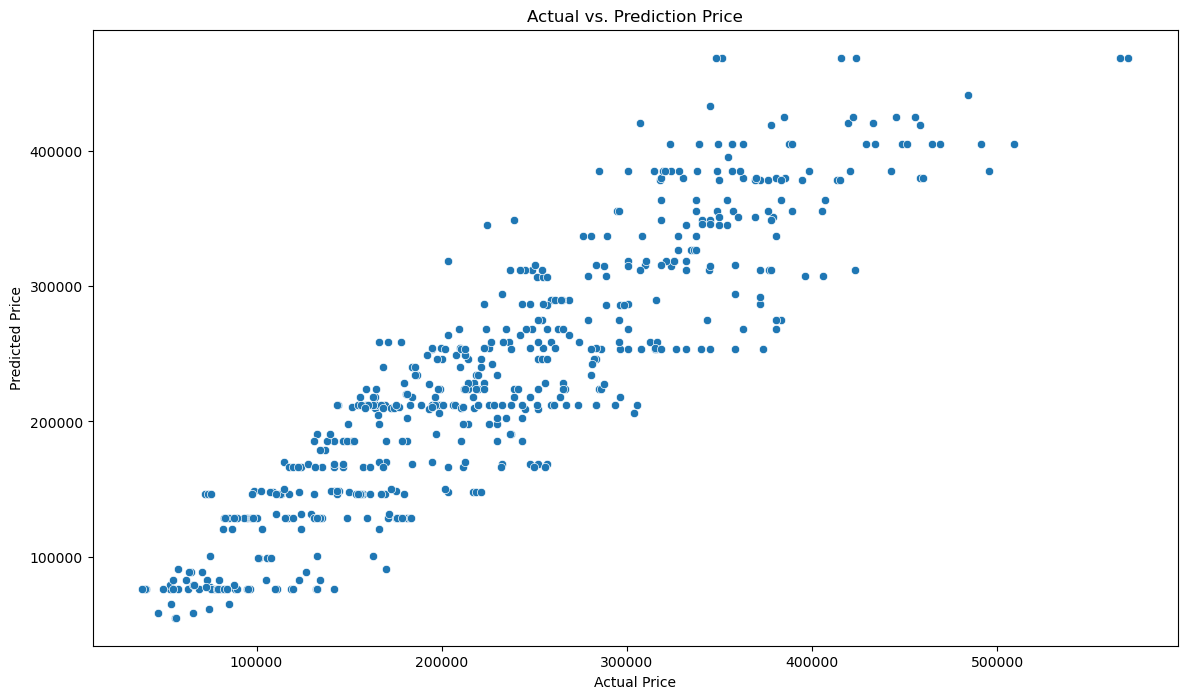

In [1138]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_tree_tuning).set(title='Actual vs. Prediction Price',  
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

In [1155]:
# Residual = y_actual - y_prediksi
residual = y_test-y_pred_tree_tuning

df_residual = pd.DataFrame({
    'y_pred': y_pred_tree_tuning,
    'residual': residual 
})

df_residual.head()

,y_pred,residual
4007,246551.206897,-32392.206897
596,224054.204545,14883.795455
2010,77645.400000,-2867.400000
1437,54754.181818,997.818182
808,286784.000000,84897.000000


<AxesSubplot:xlabel='SalePrice'>

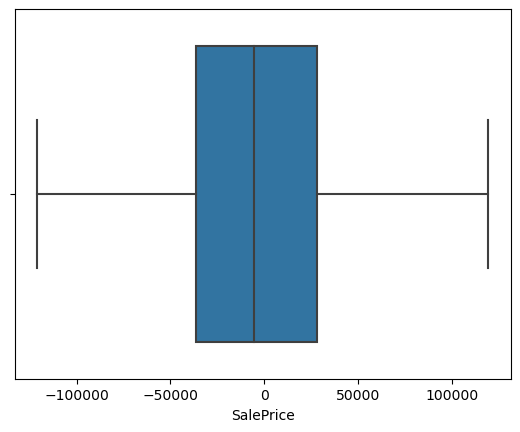

In [1254]:
# Check if the residuals have outliers

sns.boxplot(data=df_residual,x=residual) 

Based on the boxplot above, the residuals do not have outliers. This also means that RMSE, MAE, and MAPE are appropriate metrics for evaluating and selecting the best model, as outliers do not affect these three evaluation metrics.

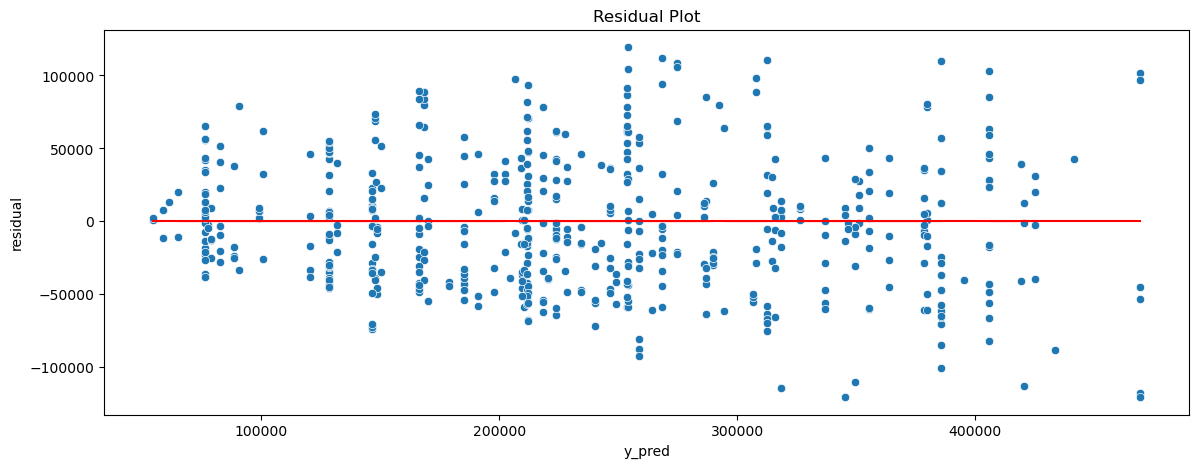

In [1187]:
# Residual Plot

plt.figure(figsize=(14,5))
sns.scatterplot(data=df_residual, x='y_pred', y='residual')
sns.lineplot(data=df_residual, x='y_pred', y=0, color='red')
plt.title('Residual Plot')
plt.show()

Based on the residual plot above, the residuals appear to be randomly distributed along the horizontal axis and do not show any specific pattern, indicating that the regression model is generally suitable for the apartment price data in Daegu, South Korea. The residual plot above represents the average absolute percentage error between the predicted apartment prices and the actual apartment prices, which is 18.9% when predicting apartment prices within the price range that the model was trained on (the minimum apartment price is 32,743 won, and the maximum apartment price is 686,840 won).

# Feature Importance

We will evaluate the features that influence apartment prices in Daegu, South Korea, in the Decision Tree Regressor model through the feature importance function.

In [1238]:
transformers=ColumnTransformer([
            ('OneHotEncoding', OneHotEncoder(drop='first'), ['HallwayType']),
            ('BinaryEncoding', ce.BinaryEncoder(), ['SubwayStation']),
            ('OrdinalEncoding', ce.OrdinalEncoder(), ['TimeToSubway'])
            ], remainder='passthrough')

# Fit column transformer to the training data
transformers.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(drop='first'),
                                 ['HallwayType']),
                                ('BinaryEncoding', BinaryEncoder(),
                                 ['SubwayStation']),
                                ('OrdinalEncoding', OrdinalEncoder(),
                                 ['TimeToSubway'])])

In [1239]:
# Algorithm

Tree=DecisionTreeRegressor(random_state=8)

pipe_model_trees=Pipeline([
        ('preprocessing',transformers),
        ('modeling',Tree)
 ])

kfold=KFold(n_splits=5)

# RandomizedSearch

randomsearch_trees=RandomizedSearchCV(
        estimator=pipe_model_trees,                # Model yang hendak di tuning
        param_distributions=hyperparam_tree,      # Hyperparameter
        cv=kfold,                                 # 5 fold cross validation
        scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
        n_jobs=-1,                                # Memaksimalkan processor
        refit='neg_mean_absolute_percentage_error',
        random_state=8
)

In [1240]:
# Fit the model with hyperparameter tuning on the training data

randomsearch_trees.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHotEncoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('BinaryEncoding',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('OrdinalEncoding',
                                                                               Or

In [1241]:
# Define the model with the best estimator

tree_tunings=randomsearch_trees.best_estimator_

# Fitting model

tree_tunings.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['HallwayType']),
                                                 ('BinaryEncoding',
                                                  BinaryEncoder(),
                                                  ['SubwayStation']),
                                                 ('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['TimeToSubway'])])),
                ('modeling',
                 DecisionTreeRegressor(criterion='absolute_error',
                                       min_samples_leaf=5, min_samples_split=6,
                                       random_state=8))])

In [1243]:
# Feature importances

feature_imp=pd.Series(tree_tunings['modeling'].feature_importances_, transformers.get_feature_names()).sort_values(ascending=False)
feature_imp.to_frame(name='Feature Importances')

,Feature Importances
OneHotEncoding__x0_terraced,0.415813
Size(sqf),0.298229
N_Parkinglot(Basement),0.183498
N_FacilitiesNearBy(ETC),0.054792
N_FacilitiesNearBy(PublicOffice),0.023962
YearBuilt,0.011186
N_FacilitiesInApt,0.008779
BinaryEncoding__SubwayStation_3,0.001718
OrdinalEncoding__TimeToSubway,0.000671
BinaryEncoding__SubwayStation_2,0.000635


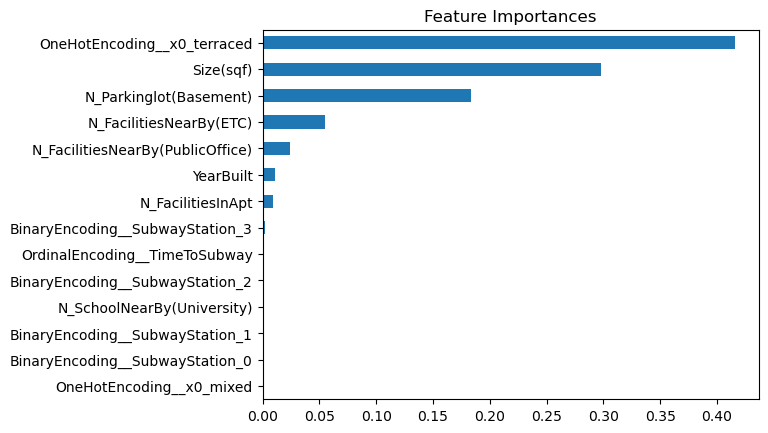

In [1250]:
# Feature importances plot

feature_imp=pd.Series(tree_tunings['modeling'].feature_importances_, transformers.get_feature_names()).sort_values(ascending=True)
feature_imp.plot(kind='barh', title='Feature Importances')

plt.show()

In the Decision Tree model with the tuned parameters, the features that have the most influence on apartment prices in Daegu, South Korea, are the type of apartment (terraced), apartment size, and the number of basement parking spaces.

# **5. Conclusion**

The evaluation metrics used for regression models are RMSE, MAE, and MAPE because these three metrics are the most commonly used for regression models and help identify how well the model can generalize the patterns found in the training data to new data. However, MAPE was chosen as the primary evaluation metric to provide easily interpretable results and help explain prediction errors to stakeholders, such as real estate agents. Based on the evaluation metrics, the final model selected for predicting apartment prices in Daegu, South Korea, is the Decision Tree Regressor model with tuned parameters, as it has an MAPE value of 18.9%. This means that when the model is used to predict apartment prices within the trained price range (minimum price of 32,743 won and maximum price of 686,840 won), the average absolute percentage error between the predicted apartment prices and the actual apartment prices is 18.9%. According to Lewis (1982), an MAPE value between 10% and 20% can be interpreted as a model with good forecasting ability.

However, apartment price predictions can still be inaccurate due to bias that may arise from the limitations of the features used, meaning that the features in the dataset may not sufficiently represent all the factors influencing apartment prices in Daegu, South Korea.

Based on the chosen final model, the most influential features on apartment prices in Daegu, South Korea, are the type of apartment (terraced), apartment size, and the number of basement parking spaces. By using the selected final model, we can assist real estate agents in determining the right selling price for apartments in Daegu, South Korea, which can improve the success rate of marketing and selling those apartment units.

Before the regression model, we only had raw data about apartment characteristics and apartment prices in Daegu, which was difficult to interpret and did not provide useful insights into the relationship between apartment characteristics and apartment prices. With the regression model, we can conduct more detailed analysis and gain a better understanding of how apartment characteristics and prices are related. Additionally, the regression model can also be used to predict changes in apartment prices that may occur if the apartment characteristics change. In this case, the impact after the regression model is much greater compared to before the regression model, because real estate agents can make more informed decisions based on the regression model's analysis results, particularly in determining the appropriate apartment price.

# **6. Recommendation**

Here are some recommendations that can be made:

1. Consider adding features that have a stronger direct relationship with apartment prices in Daegu, South Korea, such as the floor the apartment is located on, the year the apartment was sold, the number of rooms in the apartment (bedrooms, bathrooms, kitchen), information about the inclusivity of furniture in the apartment, and others.

2. Consider external factors that may overall impact the market price of apartments in Daegu, South Korea, such as interest rates, Consumer Price Index (CPI), Gross Domestic Product (GDP) performance, and others.

3. Expand the dataset by collecting more up-to-date data on apartment prices in Daegu, South Korea, to improve the relevance of the dataset when building a prediction model. This will help achieve better prediction model accuracy and assist in improving the regression model to better learn patterns in the data.

4. Try using other more complex machine learning models to build a prediction model for apartment prices, such as Recurrent Neural Networks (RNNs). However, more complex models will also make the model harder to interpret.

5. The Decision Tree Regressor model, which is the final selected model to assist real estate agents in predicting apartment prices in Daegu, South Korea, should be used to predict the minimum apartment price of 32,743 won and the maximum apartment price of 686,840 won. This will result in an average absolute percentage error between predicted and actual prices of 18.9%.



# **7. Save Machine Learning**

In [187]:
# Import pickle

import pickle as pickle

In [188]:
# Save Machine Learning

pipe_model=Pipeline([('preprocessing',transformer),('model',DecisionTreeRegressor())])
pipe_model.fit(x_train,y_train)

pickle.dump(pipe_model,open('data_daegu_apartment.sav','wb'))

In [189]:
# Load Machine Learning

file_name='data_daegu_apartment.sav'

loaded_model=pickle.load(open(file_name,'rb'))

In [191]:
mean_absolute_percentage_error(y_test,loaded_model.predict(x_test))

0.1892325613119026

In [190]:
np.sqrt(mean_squared_error(y_test,loaded_model.predict(x_test)))

45190.33687681322